In [1]:
import sys
sys.path.append('C:\\projects\\UTNCE\\src\\utnce')

In [2]:
from simplify import *
from prepare import *
from routing import *
from percolation_plot import *
from generate import *
from transfer import *
from copy import deepcopy
from shapely.geometry import Point
from pyproj import Proj, Transformer

In [3]:
osm_path = "C:\\projects\\UTNCE\\data\\Amsterdam.large.pbf"

# Subway-Amsterdam

## Generate subway networks

In [4]:
sub_stations, edges, nodes, sub_routes, check_name = prepare_metro(osm_path)

topology: 100%|████████████████████████████████████████████████████████████████████| 962/962 [00:00<00:00, 7763.00it/s]


In [5]:
edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
0,23157994,"LINESTRING (4.9236699 52.3361909, 4.9236979 52...",subway,None,0,0,1,258.660599,0.010346,258,"(0, 1)","(1, 0)"
1,23158053,"LINESTRING (4.9642294 52.2945339, 4.9644259 52...",subway,None,1,2,3,215.433271,0.008617,215,"(2, 3)","(3, 2)"
2,23158054,"LINESTRING (4.9622901 52.2955678, 4.9624673 52...",subway,None,2,4,5,121.794737,0.004872,121,"(4, 5)","(5, 4)"
3,23189033,"LINESTRING (4.8467318 52.3952137, 4.8471439 52...",subway,None,3,6,7,28.046592,0.001122,28,"(6, 7)","(7, 6)"
4,23189039,"LINESTRING (4.8409161 52.3937679, 4.8416087 52...",subway,None,4,8,492,382.935219,0.015317,382,"(8, 492)","(492, 8)"
...,...,...,...,...,...,...,...,...,...,...,...,...
957,1131538381,"LINESTRING (4.9200955 52.3417374, 4.9200444 52...",subway,None,957,803,463,73.656989,0.002946,73,"(803, 463)","(463, 803)"
958,1131538382,"LINESTRING (4.9201445 52.3416568, 4.9200955 52...",subway,None,958,462,803,9.568427,0.000383,9,"(462, 803)","(803, 462)"
959,1131538383,"LINESTRING (4.9200365 52.3417239, 4.9200773 52...",subway,None,959,804,246,9.568874,0.000383,9,"(804, 246)","(246, 804)"
960,1131538384,"LINESTRING (4.9197172 52.3423576, 4.9197589 52...",subway,None,960,463,804,73.789113,0.002952,73,"(463, 804)","(804, 463)"


In [6]:
nodes

,geometry,degree,id
0,POINT (4.9236699 52.3361909),2,0
1,POINT (4.9232197 52.3339159),2,1
2,POINT (4.9642294 52.2945339),2,2
3,POINT (4.9673168 52.2943931),2,3
4,POINT (4.9622901 52.2955678),2,4
...,...,...,...
863,POINT (4.8906476 52.3539585),2,863
864,POINT (4.8906487 52.3539577),2,864
865,POINT (4.8927726 52.3704434),2,865
866,POINT (4.9010846 52.371353),2,866


In [7]:
replacement_dict = {
     'Amsterdam Centraal': 'Centraal Station',
}


sub_routes, check_name = recheck_metro_routes(replacement_dict, sub_stations, sub_routes)

In [8]:
sub_routes

,osm_id,route,to,name,ref,network,service,geometry
0,18683,subway,Isolatorweg,Metro 50: Gein => Isolatorweg,50,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.98996 52.29640, 4.98959 52..."
1,4515354,subway,Gein,Metro 50: Isolatorweg => Gein,50,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.83880 52.38842, 4.83897 52..."
2,31249,subway,Isolatorweg,Metro 51: Centraal Station => Isolatorweg,51,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.90193 52.37689, 4.90202 52..."
3,4515355,subway,Centraal Station,Metro 51: Isolatorweg => Centraal Station,51,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.83880 52.38842, 4.83897 52..."
4,8466667,subway,Zuid,Metro 52: Noord => Zuid,52,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.93265 52.40228, 4.93269 52..."
5,8466671,subway,Noord,Metro 52: Zuid => Noord,52,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.87423 52.33922, 4.87552 52..."
6,18532,subway,Gaasperplas,Metro 53: Centraal Station => Gaasperplas,53,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.90193 52.37689, 4.90202 52..."
7,4515356,subway,Centraal Station,Metro 53: Gaasperplas => Centraal Station,53,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.98373 52.31201, 4.98364 52..."
8,18423,subway,Gein,Metro 54: Centraal Station => Gein,54,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.90193 52.37689, 4.90202 52..."
9,4515357,subway,Centraal Station,Metro 54: Gein => Centraal Station,54,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.98996 52.29640, 4.98959 52..."


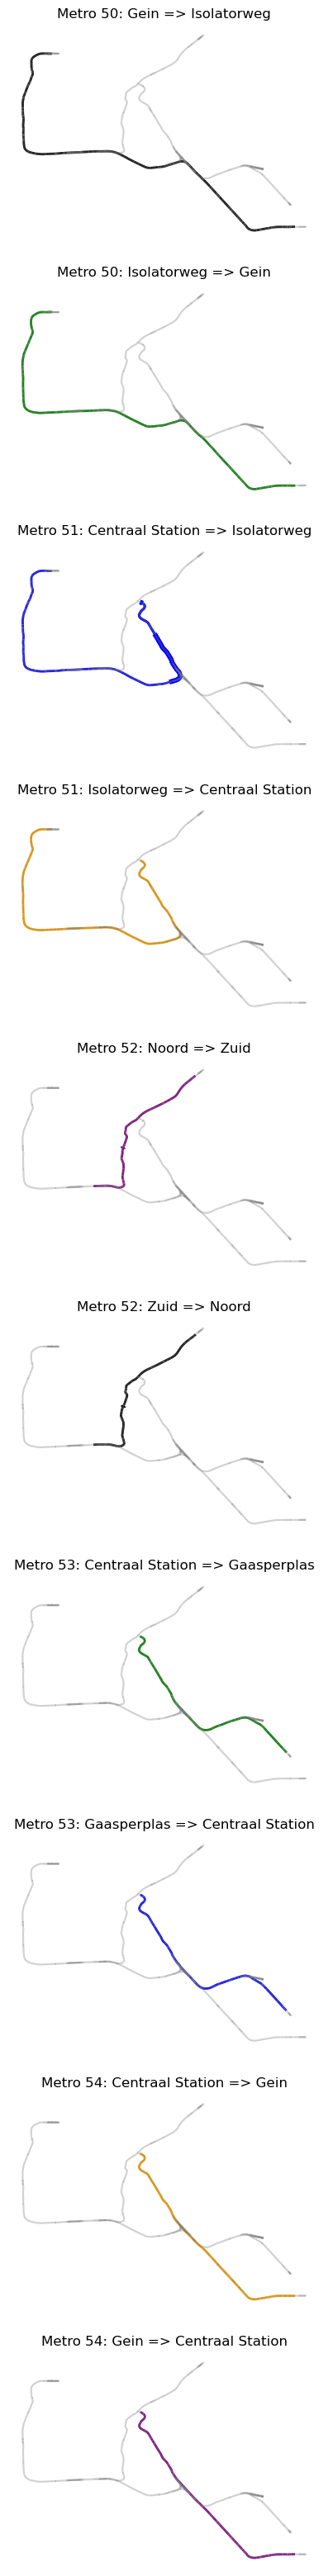

In [9]:
sub_order_route_dict, sub_shortest_path_pairs, sub_shortest_path_edges, sub_edges = metro(sub_stations, edges, nodes, sub_routes, city='Amsterdam')

In [10]:
sub_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
0,23157994,"LINESTRING (4.9236699 52.3361909, 4.9236979 52...",subway,None,0,0,1,258.660599,0.010346,258,"(0, 1)","(1, 0)"
1,23158053,"LINESTRING (4.9642294 52.2945339, 4.9644259 52...",subway,None,1,2,3,215.433271,0.008617,215,"(2, 3)","(3, 2)"
2,23158054,"LINESTRING (4.9622901 52.2955678, 4.9624673 52...",subway,None,2,4,5,121.794737,0.004872,121,"(4, 5)","(5, 4)"
3,23189033,"LINESTRING (4.8467318 52.3952137, 4.8471439 52...",subway,None,3,6,7,28.046592,0.001122,28,"(6, 7)","(7, 6)"
4,23189039,"LINESTRING (4.8409161 52.3937679, 4.8416087 52...",subway,None,4,8,492,382.935219,0.015317,382,"(8, 492)","(492, 8)"
...,...,...,...,...,...,...,...,...,...,...,...,...
957,1131538381,"LINESTRING (4.9200955 52.3417374, 4.9200444 52...",subway,None,957,803,463,73.656989,0.002946,73,"(803, 463)","(463, 803)"
958,1131538382,"LINESTRING (4.9201445 52.3416568, 4.9200955 52...",subway,None,958,462,803,9.568427,0.000383,9,"(462, 803)","(803, 462)"
959,1131538383,"LINESTRING (4.9200365 52.3417239, 4.9200773 52...",subway,None,959,804,246,9.568874,0.000383,9,"(804, 246)","(246, 804)"
960,1131538384,"LINESTRING (4.9197172 52.3423576, 4.9197589 52...",subway,None,960,463,804,73.789113,0.002952,73,"(463, 804)","(804, 463)"


In [11]:
sub_shortest_path_edges

{'Metro 50: Gein => Isolatorweg':         osm_id                                           geometry railway  \
 0    166187911  LINESTRING (4.9823107 52.2963387, 4.9838859 52...  subway   
 1    166187914  LINESTRING (4.9850607 52.2963027, 4.9855227 52...  subway   
 2    166187917  LINESTRING (4.9871059 52.2963808, 4.9873266 52...  subway   
 3    166187918  LINESTRING (4.9776921 52.2962066, 4.9783293 52...  subway   
 4    166187922  LINESTRING (4.9847395 52.2963009, 4.9850607 52...  subway   
 ..         ...                                                ...     ...   
 165  166370272  LINESTRING (4.8465456 52.3951777, 4.8467329 52...  subway   
 166  166370274  LINESTRING (4.8471465 52.3951789, 4.8471814 52...  subway   
 167  166370274  LINESTRING (4.8471814 52.3951787, 4.8473044 52...  subway   
 168  166370275  LINESTRING (4.8467329 52.3951774, 4.8471465 52...  subway   
 169  166370277  LINESTRING (4.8389786 52.3890375, 4.8389667 52...  subway   
 
     service   id  from_id  t

## Add columns to nodes

In [12]:
sub_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(sub_order_route_dict, sub_routes)

In [13]:
sub_order_route_dict

{'Metro 50: Gein => Isolatorweg':     id                 name                      geometry     geo_x  \
 0    5                 Gein  POINT (4.9891612 52.2964067)  4.989161   
 1   18           Reigersbos  POINT (4.9740002 52.2956365)     4.974   
 2   17          Holendrecht  POINT (4.9601264 52.2981319)  4.960126   
 3    6            Bullewijk   POINT (4.9521292 52.306869)  4.952129   
 4    4        Bijlmer ArenA   POINT (4.9476178 52.311806)  4.947618   
 5    3          Strandvliet  POINT (4.9413977 52.3186119)  4.941398   
 6   16         Duivendrecht  POINT (4.9365601 52.3236024)   4.93656   
 7    7      Van der Madeweg  POINT (4.9304544 52.3297847)  4.930454   
 8    9           Overamstel  POINT (4.9176063 52.3317688)  4.917606   
 9   19          Station RAI    POINT (4.889539 52.337689)  4.889539   
 10  10                 Zuid  POINT (4.8739633 52.3393223)  4.873963   
 11   8      Amstelveenseweg  POINT (4.8575709 52.3384751)  4.857571   
 12  11    Henk Sneevlietweg  P

In [14]:
sub_new_nodes = add_columns_to_nodes(sub_order_route_dict, nodes)

In [15]:
sub_new_nodes

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,POINT (4.98916 52.29641),2,328,Gein,4.989161,52.296407,"(4.9891612, 52.2964067)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
1,POINT (4.97400 52.29564),2,855,Reigersbos,4.974000,52.295637,"(4.9740002, 52.2956365)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
2,POINT (4.96013 52.29813),2,854,Holendrecht,4.960126,52.298132,"(4.9601264, 52.2981319)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
3,POINT (4.95213 52.30687),2,810,Bullewijk,4.952129,52.306869,"(4.9521292, 52.306869)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
4,POINT (4.94762 52.31181),2,809,Bijlmer ArenA,4.947618,52.311806,"(4.9476178, 52.311806)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
...,...,...,...,...,...,...,...,...,...,...,...
81,POINT (4.96734 52.32837),2,824,Verrijn Stuartweg,4.967335,52.328367,"(4.9673352, 52.3283668)",Metro 53: Gaasperplas => Centraal Station,subway,53,None
82,POINT (4.95669 52.33041),2,823,Station Diemen Zuid,4.956688,52.330406,"(4.9566878, 52.3304057)",Metro 53: Gaasperplas => Centraal Station,subway,53,None
83,POINT (4.94628 52.32683),2,829,Venserpolder,4.946277,52.326833,"(4.9462773, 52.3268326)",Metro 53: Gaasperplas => Centraal Station,subway,53,None
84,POINT (4.93028 52.32974),2,827,Van der Madeweg,4.930285,52.329735,"(4.9302846, 52.3297352)",Metro 53: Gaasperplas => Centraal Station,subway,"50, 53, 54","50, 53, 54"


In [16]:
# sub_new_nodes.to_excel('.\city_sub_new_nodes11.xlsx',header = True, index = False)

### retrive all transfer stations on each route

In [17]:
sub_transfer_stations_df = all_transfer_stations_df(sub_new_nodes)

In [18]:
sub_transfer_stations_df

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,POINT (4.98916 52.29641),2,328,Gein,4.989161,52.296407,"(4.9891612, 52.2964067)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
1,POINT (4.97400 52.29564),2,855,Reigersbos,4.974000,52.295637,"(4.9740002, 52.2956365)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
2,POINT (4.96013 52.29813),2,854,Holendrecht,4.960126,52.298132,"(4.9601264, 52.2981319)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
3,POINT (4.95213 52.30687),2,810,Bullewijk,4.952129,52.306869,"(4.9521292, 52.306869)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
4,POINT (4.94762 52.31181),2,809,Bijlmer ArenA,4.947618,52.311806,"(4.9476178, 52.311806)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54"
...,...,...,...,...,...,...,...,...,...,...,...
67,POINT (4.90094 52.37919),2,815,Centraal Station,4.900937,52.379188,"(4.9009371, 52.3791884)",Metro 52: Zuid => Noord,subway,"51, 52, 53, 54","51, 52, 53, 54"
70,POINT (4.92061 52.34019),2,830,Spaklerweg,4.920614,52.340191,"(4.9206141, 52.3401909)",Metro 53: Centraal Station => Gaasperplas,subway,"51, 53, 54","51, 53, 54"
71,POINT (4.93024 52.32972),2,826,Van der Madeweg,4.930239,52.329717,"(4.9302391, 52.3297174)",Metro 53: Centraal Station => Gaasperplas,subway,"50, 53, 54","50, 53, 54"
84,POINT (4.93028 52.32974),2,827,Van der Madeweg,4.930285,52.329735,"(4.9302846, 52.3297352)",Metro 53: Gaasperplas => Centraal Station,subway,"50, 53, 54","50, 53, 54"


In [19]:
len(sub_transfer_stations_df)

62

## Add columns to edges

In [20]:
sub_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(sub_shortest_path_edges, sub_routes)

In [21]:
sub_shortest_path_edges

{'Metro 50: Gein => Isolatorweg':         osm_id                                           geometry railway  \
 0    166187911  LINESTRING (4.9823107 52.2963387, 4.9838859 52...  subway   
 1    166187914  LINESTRING (4.9850607 52.2963027, 4.9855227 52...  subway   
 2    166187917  LINESTRING (4.9871059 52.2963808, 4.9873266 52...  subway   
 3    166187918  LINESTRING (4.9776921 52.2962066, 4.9783293 52...  subway   
 4    166187922  LINESTRING (4.9847395 52.2963009, 4.9850607 52...  subway   
 ..         ...                                                ...     ...   
 165  166370272  LINESTRING (4.8465456 52.3951777, 4.8467329 52...  subway   
 166  166370274  LINESTRING (4.8471465 52.3951789, 4.8471814 52...  subway   
 167  166370274  LINESTRING (4.8471814 52.3951787, 4.8473044 52...  subway   
 168  166370275  LINESTRING (4.8467329 52.3951774, 4.8471465 52...  subway   
 169  166370277  LINESTRING (4.8389786 52.3890375, 4.8389667 52...  subway   
 
     service   id  from_id  t

In [22]:
sub_new_edges = add_columns_to_edges(sub_shortest_path_edges,edges)

In [23]:
sub_new_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,route,ref
0,23157994,"LINESTRING (4.9236699 52.3361909, 4.9236979 52...",subway,None,0,0,1,258.660599,0.010346,258,"(0, 1)","(1, 0)",1.0,Metro 51: Isolatorweg => Centraal Station,subway,51
1,23158053,"LINESTRING (4.9642294 52.2945339, 4.9644259 52...",subway,None,1,2,3,215.433271,0.008617,215,"(2, 3)","(3, 2)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 54"
2,23158054,"LINESTRING (4.9622901 52.2955678, 4.9624673 52...",subway,None,2,4,5,121.794737,0.004872,121,"(4, 5)","(5, 4)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 54"
3,23189033,"LINESTRING (4.8467318 52.3952137, 4.8471439 52...",subway,None,3,6,7,28.046592,0.001122,28,"(6, 7)","(7, 6)",NaN,NaN,NaN,NaN
4,23189039,"LINESTRING (4.8409161 52.3937679, 4.8416087 52...",subway,None,4,8,492,382.935219,0.015317,382,"(8, 492)","(492, 8)",1.0,Metro 50: Isolatorweg => Gein,subway,"50, 51"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,1131538381,"LINESTRING (4.9200955 52.3417374, 4.9200444 52...",subway,None,957,803,463,73.656989,0.002946,73,"(803, 463)","(463, 803)",1.0,Metro 53: Gaasperplas => Centraal Station,subway,"53, 54"
958,1131538382,"LINESTRING (4.9201445 52.3416568, 4.9200955 52...",subway,None,958,462,803,9.568427,0.000383,9,"(462, 803)","(803, 462)",1.0,Metro 53: Gaasperplas => Centraal Station,subway,"53, 54"
959,1131538383,"LINESTRING (4.9200365 52.3417239, 4.9200773 52...",subway,None,959,804,246,9.568874,0.000383,9,"(804, 246)","(246, 804)",1.0,Metro 51: Isolatorweg => Centraal Station,subway,51
960,1131538384,"LINESTRING (4.9197172 52.3423576, 4.9197589 52...",subway,None,960,463,804,73.789113,0.002952,73,"(463, 804)","(804, 463)",1.0,Metro 51: Isolatorweg => Centraal Station,subway,51


# Tram-Amsterdam

## Generate tram networks

In [24]:
city_tram_stations, edges, nodes, city_tram_routes = prepare_tram(osm_path)

topology: 100%|██████████████████████████████████████████████████████████████████| 2204/2204 [00:00<00:00, 8609.35it/s]


Calculate_degree possibly unhappy


In [25]:
edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
0,7045610,"LINESTRING (4.9324018 52.3610615, 4.932387 52....",tram,None,0,0,1,28.561299,0.002040,28,"(0, 1)","(1, 0)"
1,7045616,"LINESTRING (4.934085 52.3609657, 4.9340765 52....",tram,None,1,2,3,146.082551,0.010434,146,"(2, 3)","(3, 2)"
2,7045675,"LINESTRING (4.9337809 52.3611734, 4.9339017 52...",tram,None,2,4,5,390.987463,0.027928,390,"(4, 5)","(5, 4)"
3,7045689,"LINESTRING (4.9394 52.361617, 4.9385742 52.361...",tram,None,3,6,7,345.247175,0.024661,345,"(6, 7)","(7, 6)"
4,7045994,"LINESTRING (4.9157261 52.365067, 4.9157046 52....",tram,None,4,8,1730,35.152166,0.002511,35,"(8, 1730)","(1730, 8)"
...,...,...,...,...,...,...,...,...,...,...,...,...
2199,1185084715,"LINESTRING (4.8520736 52.3479443, 4.8521852 52...",tram,None,2199,1496,594,11.280287,0.000806,11,"(1496, 594)","(594, 1496)"
2200,1185084716,"LINESTRING (4.852325 52.3480075, 4.852489 52.3...",tram,None,2200,562,1072,12.010525,0.000858,12,"(562, 1072)","(1072, 562)"
2201,1185084717,"LINESTRING (4.8516012 52.3470208, 4.8519064 52...",tram,None,2201,1497,561,81.765515,0.005840,81,"(1497, 561)","(561, 1497)"
2202,1185084718,"LINESTRING (4.8522982 52.348033, 4.8524709 52....",tram,None,2202,566,1079,12.587379,0.000899,12,"(566, 1079)","(1079, 566)"


In [26]:
nodes

,geometry,degree,id
0,POINT (4.9324018 52.3610615),3,0
1,POINT (4.9321097 52.361227),3,1
2,POINT (4.934085 52.3609657),3,2
3,POINT (4.933017 52.3603624),3,3
4,POINT (4.9337809 52.3611734),3,4
...,...,...,...
1915,POINT (4.9009826 52.3777045),0,1915
1916,POINT (4.890644 52.3719008),2,1916
1917,POINT (4.9899502 52.3580579),2,1917
1918,POINT (4.9272548 52.357015),0,1918


In [27]:
city_tram_routes

,osm_id,route,to,name,ref,network,service,geometry
17,31398,tram,"Amsterdam, De Boelelaan/VU",Tram 24: Amsterdam Centraal Station => Amsterd...,24,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.89406 52.37387, 4.89361 52..."
18,31530,tram,"Amsterdam, Oudenaardeplantsoen",Tram 2: Amsterdam Centraal Station => Amsterda...,2,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.81102 52.34641, 4.81118 52..."
19,31794,tram,"Amsterdam, Drentepark",Tram 4: Amsterdam Centraal Station => Amsterda...,4,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.89406 52.37387, 4.89361 52..."
22,32579,tram,"Amsterdam, Osdorp Dijkgraafsplein",Tram 17: Amsterdam Centraal Station => Amsterd...,17,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.89915 52.37828, 4.89919 52..."
23,32615,tram,"Amsterdam, IJburg",Tram 26: Amsterdam Centraal Station => Amsterd...,26,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.90035 52.37793, 4.90035 52..."
24,32867,tram,"Amsterdam, Lambertus Zijlplein",Tram 13: Amsterdam Centraal Station => Amsterd...,13,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.89922 52.37830, 4.89926 52..."
390,4494870,tram,"Amsterdam, Centraal Station",Tram 4: Amsterdam Station RAI => Amsterdam Cen...,4,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.88956 52.33608, 4.88962 52..."
391,4497721,tram,"Amsterdam, Centraal Station",Tram 2: Amsterdam Nieuw Sloten => Amsterdam Ce...,2,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.80985 52.34614, 4.81032 52..."
392,4512710,tram,Amsterdam Centraal Station,Tram 13: Amsterdam Geuzenveld => Amsterdam Cen...,13,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.80291 52.37726, 4.80320 52..."
393,4513899,tram,"Amsterdam, Centraal Station",Tram 24: Amsterdam VUmc => Amsterdam Centraal ...,24,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.86582 52.33525, 4.86638 52..."


In [28]:
city_tram_routes = city_tram_routes.loc[city_tram_routes.ref != 'EMA']

In [29]:
city_tram_routes, check_name = check_tram_routes(city_tram_stations, city_tram_routes)

In [30]:
replacement_dict = {
    ',': '',
    'Diemen': '',
    'Amsterdam': '',
    'Sloterdijk': 'Station Sloterdijk',
    'Osdorp Dijkgraafsplein': 'Dijkgraafplein',
    'Osdorp De Aker': 'Matterhorn'
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)

In [31]:
replacement_dict = {
    'Amstelveen Westwijk': 'Westwijk'
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)

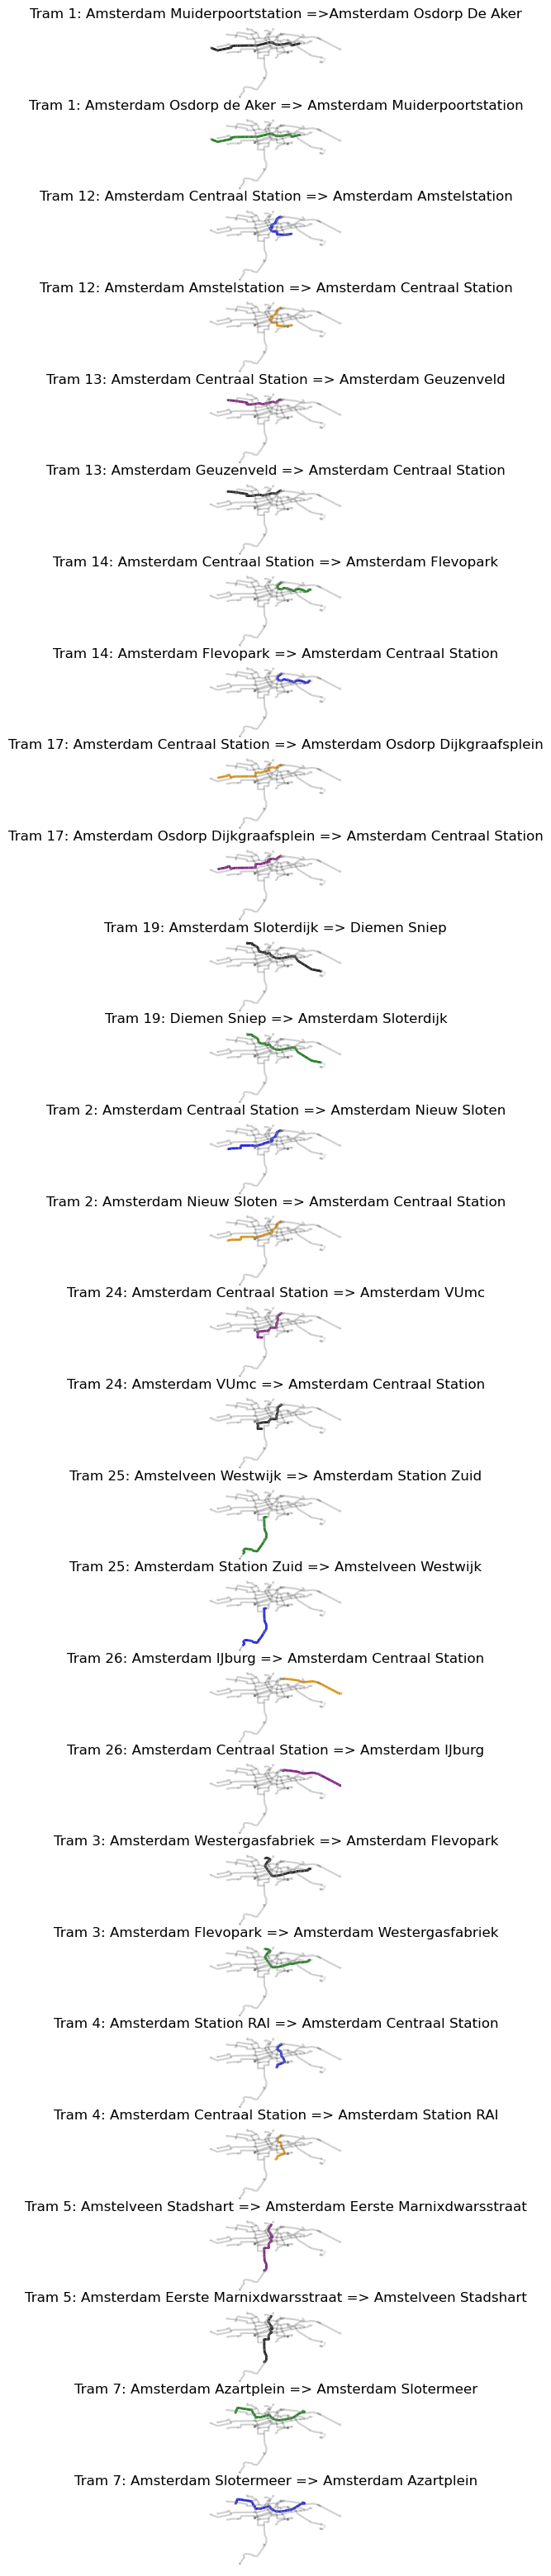

In [32]:
city_tram_order_route_dict, city_tram_shortest_path_pairs, city_tram_shortest_path_edges, tram_edges = tram(city_tram_stations, edges, nodes, city_tram_routes, city='Amsterdam')

In [33]:
tram_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
0,7045610,"LINESTRING (4.9324018 52.3610615, 4.932387 52....",tram,None,0,0,1,28.561299,0.002040,28,"(0, 1)","(1, 0)"
1,7045616,"LINESTRING (4.934085 52.3609657, 4.9340765 52....",tram,None,1,2,3,146.082551,0.010434,146,"(2, 3)","(3, 2)"
2,7045675,"LINESTRING (4.9337809 52.3611734, 4.9339017 52...",tram,None,2,4,5,390.987463,0.027928,390,"(4, 5)","(5, 4)"
3,7045689,"LINESTRING (4.9394 52.361617, 4.9385742 52.361...",tram,None,3,6,7,345.247175,0.024661,345,"(6, 7)","(7, 6)"
4,7045994,"LINESTRING (4.9157261 52.365067, 4.9157046 52....",tram,None,4,8,1730,35.152166,0.002511,35,"(8, 1730)","(1730, 8)"
...,...,...,...,...,...,...,...,...,...,...,...,...
2199,1185084715,"LINESTRING (4.8520736 52.3479443, 4.8521852 52...",tram,None,2199,1496,594,11.280287,0.000806,11,"(1496, 594)","(594, 1496)"
2200,1185084716,"LINESTRING (4.852325 52.3480075, 4.852489 52.3...",tram,None,2200,562,1072,12.010525,0.000858,12,"(562, 1072)","(1072, 562)"
2201,1185084717,"LINESTRING (4.8516012 52.3470208, 4.8519064 52...",tram,None,2201,1497,561,81.765515,0.005840,81,"(1497, 561)","(561, 1497)"
2202,1185084718,"LINESTRING (4.8522982 52.348033, 4.8524709 52....",tram,None,2202,566,1079,12.587379,0.000899,12,"(566, 1079)","(1079, 566)"


## Add columns to nodes

In [34]:
city_tram_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_order_route_dict, city_tram_routes)

In [35]:
city_tram_order_route_dict

{'Tram 1: Amsterdam Muiderpoortstation =>Amsterdam Osdorp De Aker':     id                              name                      geometry  \
 0   21                Muiderpoortstation  POINT (4.9326128 52.3607965)   
 1    0                      Dapperstraat  POINT (4.9289422 52.3609314)   
 2    6                    Linnaeusstraat  POINT (4.9257029 52.3601162)   
 3    7                         Beukenweg  POINT (4.9167422 52.3590732)   
 4    4         Korte 's-Gravesandestraat  POINT (4.9135923 52.3623479)   
 5    3                      Weesperplein  POINT (4.9071213 52.3610021)   
 6   22                    Frederiksplein  POINT (4.8978483 52.3594109)   
 7    5                      Vijzelgracht  POINT (4.8921024 52.3595051)   
 8    1                       Rijksmuseum   POINT (4.887104 52.3609734)   
 9   23                       Leidseplein  POINT (4.8810698 52.3632085)   
 10  13  Eerste Constantijn Huygensstraat  POINT (4.8747145 52.3626163)   
 11  24            Jan Pieter Hei

In [36]:
city_tram_new_nodes = add_columns_to_nodes(city_tram_order_route_dict, nodes)

In [37]:
city_tram_new_nodes

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,POINT (4.93261 52.36080),2,1341,Muiderpoortstation,4.932613,52.360796,"(4.9326128, 52.3607965)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
1,POINT (4.92894 52.36093),2,1503,Dapperstraat,4.928942,52.360931,"(4.9289422, 52.3609314)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
2,POINT (4.92570 52.36012),2,1606,Linnaeusstraat,4.925703,52.360116,"(4.9257029, 52.3601162)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
3,POINT (4.91674 52.35907),2,1612,Beukenweg,4.916742,52.359073,"(4.9167422, 52.3590732)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
4,POINT (4.91359 52.36235),2,1598,Korte 's-Gravesandestraat,4.913592,52.362348,"(4.9135923, 52.3623479)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 19, 7","1, 19, 7"
...,...,...,...,...,...,...,...,...,...,...,...
413,POINT (4.92630 52.36814),2,1559,Eerste Coehoornstraat,4.926300,52.368143,"(4.9263002, 52.3681426)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,7,None
414,POINT (4.92960 52.37020),2,1808,Eerste Leeghwaterstraat,4.929600,52.370198,"(4.9295997, 52.3701978)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,7,None
415,POINT (4.93483 52.37301),2,1515,Rietlandpark,4.934833,52.373011,"(4.9348327, 52.3730107)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,"26, 7","26, 7"
416,POINT (4.93817 52.37346),2,1751,C. van Eesterenlaan,4.938170,52.373460,"(4.9381702, 52.3734596)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,7,None


In [38]:
# city_tram_new_nodes.to_excel('./city_tram_new_nodes11.xlsx',header = True, index = False)

### retrive all transfer stations on each route

In [39]:
city_tram_transfer_stations_df = all_transfer_stations_df(city_tram_new_nodes)

In [40]:
city_tram_transfer_stations_df

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,POINT (4.93261 52.36080),2,1341,Muiderpoortstation,4.932613,52.360796,"(4.9326128, 52.3607965)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
1,POINT (4.92894 52.36093),2,1503,Dapperstraat,4.928942,52.360931,"(4.9289422, 52.3609314)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
2,POINT (4.92570 52.36012),2,1606,Linnaeusstraat,4.925703,52.360116,"(4.9257029, 52.3601162)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
3,POINT (4.91674 52.35907),2,1612,Beukenweg,4.916742,52.359073,"(4.9167422, 52.3590732)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
4,POINT (4.91359 52.36235),2,1598,Korte 's-Gravesandestraat,4.913592,52.362348,"(4.9135923, 52.3623479)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 19, 7","1, 19, 7"
...,...,...,...,...,...,...,...,...,...,...,...
393,POINT (4.84859 52.37333),2,1642,Jan van Galenstraat,4.848589,52.373332,"(4.8485891, 52.3733319)",Tram 7: Amsterdam Azartplein => Amsterdam Slot...,tram,"13, 19, 7","13, 19, 7"
408,POINT (4.84872 52.37298),2,1802,Jan van Galenstraat,4.848724,52.372983,"(4.8487242, 52.3729826)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,"13, 19, 7","13, 19, 7"
409,POINT (4.85007 52.37041),2,1888,Mercatorplein,4.850068,52.370406,"(4.8500681, 52.3704058)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,"13, 7","13, 7"
411,POINT (4.91857 52.36337),2,1803,Alexanderplein,4.918568,52.363371,"(4.9185684, 52.3633708)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,"14, 19, 7","14, 19, 7"


In [41]:
len(city_tram_transfer_stations_df)

183

## Add columns to edges

In [42]:
city_tram_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_shortest_path_edges, city_tram_routes)

In [43]:
city_tram_shortest_path_edges

{'Tram 1: Amsterdam Muiderpoortstation =>Amsterdam Osdorp De Aker':        osm_id                                           geometry railway  \
 0     7045610  LINESTRING (4.9324018 52.3610615, 4.932387 52....    tram   
 1   770429442  LINESTRING (4.9326128 52.3607965, 4.9325204 52...    tram   
 2   770429442  LINESTRING (4.9325122 52.3609243, 4.9324018 52...    tram   
 3   770438581  LINESTRING (4.9321097 52.361227, 4.9305569 52....    tram   
 4   770438581  LINESTRING (4.9289422 52.3609314, 4.9288413 52...    tram   
 ..        ...                                                ...     ...   
 91   26594761  LINESTRING (4.785218 52.3495798, 4.7849725 52....    tram   
 92  322841907  LINESTRING (4.7881565 52.3496994, 4.7880725 52...    tram   
 93  322841927  LINESTRING (4.7849725 52.3496771, 4.7836582 52...    tram   
 94  322841927  LINESTRING (4.7836582 52.3501979, 4.7833776 52...    tram   
 95  322841927  LINESTRING (4.7770976 52.352828, 4.7768625 52....    tram   
 
    ser

In [44]:
city_tram_new_edges = add_columns_to_edges(city_tram_shortest_path_edges,edges)

In [45]:
city_tram_new_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,route,ref
0,7045610,"LINESTRING (4.9324018 52.3610615, 4.932387 52....",tram,None,0,0,1,28.561299,0.002040,28,"(0, 1)","(1, 0)",1.0,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,1
1,7045616,"LINESTRING (4.934085 52.3609657, 4.9340765 52....",tram,None,1,2,3,146.082551,0.010434,146,"(2, 3)","(3, 2)",NaN,NaN,NaN,NaN
2,7045675,"LINESTRING (4.9337809 52.3611734, 4.9339017 52...",tram,None,2,4,5,390.987463,0.027928,390,"(4, 5)","(5, 4)",1.0,Tram 3: Amsterdam Westergasfabriek => Amsterda...,tram,3
3,7045689,"LINESTRING (4.9394 52.361617, 4.9385742 52.361...",tram,None,3,6,7,345.247175,0.024661,345,"(6, 7)","(7, 6)",1.0,Tram 3: Amsterdam Flevopark => Amsterdam Weste...,tram,3
4,7045994,"LINESTRING (4.9157261 52.365067, 4.9157046 52....",tram,None,4,8,1730,35.152166,0.002511,35,"(8, 1730)","(1730, 8)",1.0,Tram 14: Amsterdam Flevopark => Amsterdam Cent...,tram,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199,1185084715,"LINESTRING (4.8520736 52.3479443, 4.8521852 52...",tram,None,2199,1496,594,11.280287,0.000806,11,"(1496, 594)","(594, 1496)",NaN,NaN,NaN,NaN
2200,1185084716,"LINESTRING (4.852325 52.3480075, 4.852489 52.3...",tram,None,2200,562,1072,12.010525,0.000858,12,"(562, 1072)","(1072, 562)",NaN,NaN,NaN,NaN
2201,1185084717,"LINESTRING (4.8516012 52.3470208, 4.8519064 52...",tram,None,2201,1497,561,81.765515,0.005840,81,"(1497, 561)","(561, 1497)",NaN,NaN,NaN,NaN
2202,1185084718,"LINESTRING (4.8522982 52.348033, 4.8524709 52....",tram,None,2202,566,1079,12.587379,0.000899,12,"(566, 1079)","(1079, 566)",NaN,NaN,NaN,NaN


# Bus-Amsterdam

## Generate bus networks

In [62]:
city_bus_stations, edges, nodes, city_bus_routes = prepare_bus(osm_path)

topology: 100%|████████████████████████████████████████████████████████████████| 71634/71634 [00:08<00:00, 8061.42it/s]


In [63]:
edges

,osm_id,geometry,service,id,from_id,to_id,distance,time,weights,to_from,from_to,railway
0,4436684,"LINESTRING (4.9683596 52.3558775, 4.9683345 52...",steps,0,0,1,4.049164,0.000324,4,"(0, 1)","(1, 0)",bus
1,4495957,"LINESTRING (4.8601784 52.357593, 4.8601399 52....",steps,1,2,3,7.754968,0.000620,7,"(2, 3)","(3, 2)",bus
2,4496429,"LINESTRING (4.8743983 52.358788, 4.8744747 52....",service,2,4,5,68.807947,0.005505,68,"(4, 5)","(5, 4)",bus
3,4727308,"LINESTRING (4.9563878 52.377293, 4.9564629 52....",path,3,6,65237,46.383298,0.003711,46,"(6, 65237)","(65237, 6)",bus
4,4727308,"LINESTRING (4.9564856 52.376881, 4.9564944 52....",path,4,65237,7,2.090290,0.000167,2,"(65237, 7)","(7, 65237)",bus
...,...,...,...,...,...,...,...,...,...,...,...,...
71623,1185077512,"LINESTRING (4.795149 52.3318873, 4.7953163 52....",service,71623,65586,65587,29.884042,0.002391,29,"(65586, 65587)","(65587, 65586)",bus
71624,1185077519,"LINESTRING (4.7974835 52.3325307, 4.7972201 52...",service,71624,65588,65589,19.267219,0.001541,19,"(65588, 65589)","(65589, 65588)",bus
71625,1185077520,"LINESTRING (4.7967795 52.3323057, 4.7972519 52...",service,71625,65590,65591,34.723141,0.002778,34,"(65590, 65591)","(65591, 65590)",bus
71626,1185077524,"LINESTRING (4.7997017 52.3324389, 4.7997688 52...",path,71626,65592,65593,65.462451,0.005237,65,"(65592, 65593)","(65593, 65592)",bus


In [64]:
nodes

,geometry,degree,id
0,POINT (4.9683596 52.3558775),1,0
1,POINT (4.9683118 52.3558559),1,1
2,POINT (4.8601784 52.357593),1,2
3,POINT (4.8601399 52.3576586),1,3
4,POINT (4.8743983 52.358788),1,4
...,...,...,...
68437,POINT (4.8808204 52.3586774),0,68437
68438,POINT (4.8688259 52.3392455),2,68438
68439,POINT (4.8690257 52.3316423),2,68439
68440,POINT (4.8705297 52.3165252),2,68440


In [65]:
city_bus_routes

,osm_id,route,to,name,ref,network,service,geometry
31,73789,bus,Amsterdam Muiderpoortstation,Bus 40: Amsterdam Amstelstation => Amsterdam M...,40,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.91869 52.34617, 4.91868 52..."
37,146350,bus,"Schiphol, Airport/Plaza",Bus 365: Leiden Centraal Station => Schiphol A...,365,Zuid-Holland Noord,None,"MULTILINESTRING ((4.76218 52.30830, 4.76200 52..."
44,156123,bus,Marken Minneweg,Bus 315: Amsterdam Station Noord => Marken Min...,315,Waterland,None,"MULTILINESTRING ((4.93321 52.40187, 4.93311 52..."
52,161790,bus,"Nieuw Vennep, P+R Getsewoud Zuid",Bus 397: Amsterdam Busstation Elandsgracht → N...,397,Amstelland-Meerlanden,None,"MULTILINESTRING ((4.87678 52.36968, 4.87687 52..."
91,169215,bus,"Haarlem, Station",Bus 300: Amsterdam Bijlmer ArenA → Haarlem Sta...,300,Amstelland-Meerlanden,None,"MULTILINESTRING ((4.94705 52.31143, 4.94711 52..."
...,...,...,...,...,...,...,...,...
1446,13630218,bus,"Amsterdam, Station Noord",Bus 292: Zaandam De Vlinder => Amsterdam Stati...,292,Zaanstreek,None,"MULTILINESTRING ((4.85659 52.42963, 4.85664 52..."
1447,13631642,bus,"Assendelft, Festina Lente",Bus 63: Zaandam Station => Assendelft Festina ...,63,Zaanstreek,None,"MULTILINESTRING ((4.81643 52.43588, 4.81651 52..."
1448,13633193,bus,"Zaandam, Station",Bus 63: Assendelft Festina Lente => Zaandam St...,63,Zaanstreek,None,"MULTILINESTRING ((4.81436 52.43590, 4.81452 52..."
1470,14979096,bus,"Amsterdam, Station Bijlmer ArenA",Bus 330: Almere Station Buiten => Amsterdam St...,330,Busvervoer Almere,None,"MULTILINESTRING ((5.05775 52.32570, 5.05723 52..."


In [66]:
city_bus_routes = city_bus_routes.loc[city_bus_routes.network == 'Stadsvervoer Amsterdam']
city_bus_routes = city_bus_routes.loc[city_bus_routes.service != 'night']

In [67]:
city_bus_routes, check_name = check_bus_routes(city_bus_stations, city_bus_routes)

In [68]:
replacement_dict = {
    'Amsterdam, ': '',
    'Amsterdam': '',
    'Weesp Station': 'Station',
    'Osdorp De Aker': 'Matterhorn',
    'Schiphol, Airport/Plaza': 'Schiphol, Airport',
    'De Boelelaan': 'De Boelelaan/De Klencke'
}
replacement_dict1 = {
    'Amsterdam, ': '',
    'Amsterdam': '',
}

city_bus_stations['name'] = city_bus_stations['name'].replace(replacement_dict1, regex=True).str.strip()

city_bus_stations, city_bus_routes, check_name = recheck_bus_routes(replacement_dict, city_bus_stations, city_bus_routes)

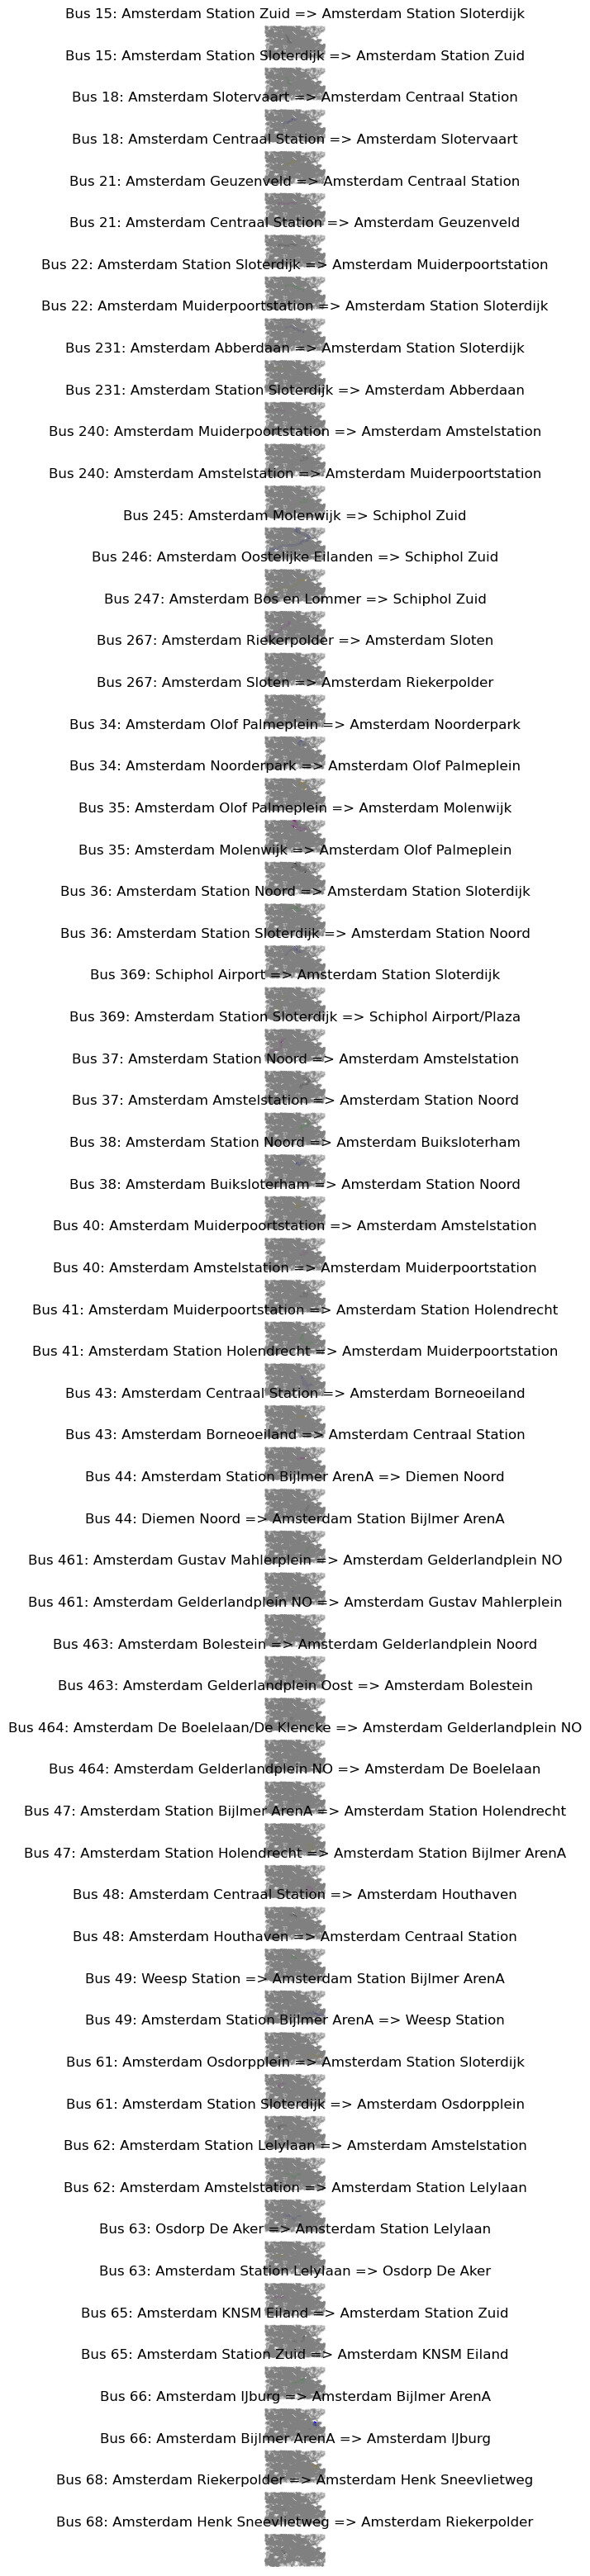

In [69]:
city_bus_order_route_dict, city_bus_shortest_path_pairs, city_bus_shortest_path_edges, bus_edges = bus(city_bus_stations, edges, nodes, city_bus_routes, city='Amsterdam')

In [70]:
len(city_bus_order_route_dict)

61

In [71]:
bus_edges

,osm_id,geometry,service,id,from_id,to_id,distance,time,weights,to_from,from_to,railway
0,4436684,"LINESTRING (4.9683596 52.3558775, 4.9683345 52...",steps,0,0,1,4.049164,0.000324,4,"(0, 1)","(1, 0)",bus
1,4495957,"LINESTRING (4.8601784 52.357593, 4.8601399 52....",steps,1,2,3,7.754968,0.000620,7,"(2, 3)","(3, 2)",bus
2,4496429,"LINESTRING (4.8743983 52.358788, 4.8744747 52....",service,2,4,5,68.807947,0.005505,68,"(4, 5)","(5, 4)",bus
3,4727308,"LINESTRING (4.9563878 52.377293, 4.9564629 52....",path,3,6,65237,46.383298,0.003711,46,"(6, 65237)","(65237, 6)",bus
4,4727308,"LINESTRING (4.9564856 52.376881, 4.9564944 52....",path,4,65237,7,2.090290,0.000167,2,"(65237, 7)","(7, 65237)",bus
...,...,...,...,...,...,...,...,...,...,...,...,...
71623,1185077512,"LINESTRING (4.795149 52.3318873, 4.7953163 52....",service,71623,65586,65587,29.884042,0.002391,29,"(65586, 65587)","(65587, 65586)",bus
71624,1185077519,"LINESTRING (4.7974835 52.3325307, 4.7972201 52...",service,71624,65588,65589,19.267219,0.001541,19,"(65588, 65589)","(65589, 65588)",bus
71625,1185077520,"LINESTRING (4.7967795 52.3323057, 4.7972519 52...",service,71625,65590,65591,34.723141,0.002778,34,"(65590, 65591)","(65591, 65590)",bus
71626,1185077524,"LINESTRING (4.7997017 52.3324389, 4.7997688 52...",path,71626,65592,65593,65.462451,0.005237,65,"(65592, 65593)","(65593, 65592)",bus


## Add columns to nodes

In [72]:
city_bus_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_bus_order_route_dict, city_bus_routes)

In [73]:
city_bus_order_route_dict

{'Bus 15: Amsterdam Station Zuid => Amsterdam Station Sloterdijk':     id                   name                      geometry     geo_x  \
 0    6           Station Zuid  POINT (4.8720355 52.3408188)  4.872035   
 1    3    Prinses Irenestraat  POINT (4.8682898 52.3428941)   4.86829   
 2   10           Olympiaplein   POINT (4.865862 52.3462864)  4.865862   
 3    8             Olympiaweg  POINT (4.8583469 52.3452468)  4.858347   
 4   28  Haarlemmermeerstation  POINT (4.8576315 52.3492179)  4.857632   
 5   22             Zeilstraat  POINT (4.8566667 52.3512098)  4.856667   
 6   21        Amstelveenseweg  POINT (4.8560722 52.3513667)  4.856072   
 7    1         Hoofddorpplein  POINT (4.8503895 52.3520264)   4.85039   
 8   20   Haarlemmermeerstraat  POINT (4.8503138 52.3554125)  4.850314   
 9   23          Surinameplein  POINT (4.8521842 52.3580689)  4.852184   
 10  26        Corantijnstraat  POINT (4.8532685 52.3617315)  4.853269   
 11  24             Postjesweg    POINT (4.853

In [74]:
city_bus_new_nodes = add_columns_to_nodes(city_bus_order_route_dict, nodes)

In [75]:
city_bus_new_nodes

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,POINT (4.87204 52.34082),2,14779,Station Zuid,4.872035,52.340819,"(4.8720355, 52.3408188)",Bus 15: Amsterdam Station Zuid => Amsterdam St...,bus,"15, 62, 65","15, 62, 65"
1,POINT (4.86829 52.34289),2,67476,Prinses Irenestraat,4.868290,52.342894,"(4.8682898, 52.3428941)",Bus 15: Amsterdam Station Zuid => Amsterdam St...,bus,"15, 246, 65","15, 246, 65"
2,POINT (4.86586 52.34629),2,68204,Olympiaplein,4.865862,52.346286,"(4.865862, 52.3462864)",Bus 15: Amsterdam Station Zuid => Amsterdam St...,bus,15,None
3,POINT (4.85835 52.34525),2,68196,Olympiaweg,4.858347,52.345247,"(4.8583469, 52.3452468)",Bus 15: Amsterdam Station Zuid => Amsterdam St...,bus,15,None
4,POINT (4.85763 52.34922),2,68341,Haarlemmermeerstation,4.857632,52.349218,"(4.8576315, 52.3492179)",Bus 15: Amsterdam Station Zuid => Amsterdam St...,bus,"15, 62","15, 62"
...,...,...,...,...,...,...,...,...,...,...,...
752,POINT (4.99474 52.35561),2,67471,Diemerparklaan,4.994741,52.355608,"(4.9947414, 52.355608)",Bus 66: Amsterdam Bijlmer ArenA => Amsterdam I...,bus,66,None
753,POINT (4.82444 52.34041),3,15699,John M. Keynesplein,4.824444,52.340413,"(4.824444, 52.340413)",Bus 68: Amsterdam Riekerpolder => Amsterdam He...,bus,"267, 68","267, 68"
754,POINT (4.82789 52.34108),2,11244,IBM,4.827888,52.341080,"(4.827888, 52.3410803)",Bus 68: Amsterdam Riekerpolder => Amsterdam He...,bus,"267, 68","267, 68"
755,POINT (4.82867 52.34260),3,26843,Parkeerdek,4.828668,52.342595,"(4.8286682, 52.3425954)",Bus 68: Amsterdam Riekerpolder => Amsterdam He...,bus,68,None


### retrive all transfer stations on each route

In [76]:
city_bus_transfer_stations_df = all_transfer_stations_df(city_bus_new_nodes)

In [77]:
city_bus_transfer_stations_df

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,POINT (4.87204 52.34082),2,14779,Station Zuid,4.872035,52.340819,"(4.8720355, 52.3408188)",Bus 15: Amsterdam Station Zuid => Amsterdam St...,bus,"15, 62, 65","15, 62, 65"
1,POINT (4.86829 52.34289),2,67476,Prinses Irenestraat,4.868290,52.342894,"(4.8682898, 52.3428941)",Bus 15: Amsterdam Station Zuid => Amsterdam St...,bus,"15, 246, 65","15, 246, 65"
4,POINT (4.85763 52.34922),2,68341,Haarlemmermeerstation,4.857632,52.349218,"(4.8576315, 52.3492179)",Bus 15: Amsterdam Station Zuid => Amsterdam St...,bus,"15, 62","15, 62"
5,POINT (4.85667 52.35121),2,68268,Zeilstraat,4.856667,52.351210,"(4.8566667, 52.3512098)",Bus 15: Amsterdam Station Zuid => Amsterdam St...,bus,"15, 62","15, 62"
6,POINT (4.85607 52.35137),2,68266,Amstelveenseweg,4.856072,52.351367,"(4.8560722, 52.3513667)",Bus 15: Amsterdam Station Zuid => Amsterdam St...,bus,"15, 246, 62","15, 246, 62"
...,...,...,...,...,...,...,...,...,...,...,...
740,POINT (4.96581 52.31983),0,66747,Tulastraat,4.965810,52.319830,"(4.96581, 52.3198302)",Bus 66: Amsterdam Bijlmer ArenA => Amsterdam I...,bus,"41, 47, 66","41, 47, 66"
741,POINT (4.97152 52.32169),0,67123,Annie Romeinplein,4.971517,52.321685,"(4.9715166, 52.3216851)",Bus 66: Amsterdam Bijlmer ArenA => Amsterdam I...,bus,"41, 66","41, 66"
742,POINT (4.97323 52.32306),2,67461,Station Ganzenhoef,4.973228,52.323056,"(4.9732278, 52.323056)",Bus 66: Amsterdam Bijlmer ArenA => Amsterdam I...,bus,"41, 66","41, 66"
753,POINT (4.82444 52.34041),3,15699,John M. Keynesplein,4.824444,52.340413,"(4.824444, 52.340413)",Bus 68: Amsterdam Riekerpolder => Amsterdam He...,bus,"267, 68","267, 68"


In [78]:
len(city_bus_transfer_stations_df)

351

## Add columns to edges

In [79]:
city_bus_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_bus_shortest_path_edges, city_bus_routes)

In [80]:
city_bus_shortest_path_edges

{'Bus 15: Amsterdam Station Zuid => Amsterdam Station Sloterdijk':          osm_id                                           geometry  \
 0      26956728  LINESTRING (4.8720355 52.3408188, 4.8717707 52...   
 1      26956728  LINESTRING (4.8717707 52.3408097, 4.8716246 52...   
 2      26956728  LINESTRING (4.8705601 52.3407731, 4.8702988 52...   
 3      26956728  LINESTRING (4.8702988 52.3407626, 4.868856 52....   
 4      26982261  LINESTRING (4.8685173 52.3409372, 4.8684681 52...   
 ..          ...                                                ...   
 123   935010194  LINESTRING (4.8435054 52.3848361, 4.8436903 52...   
 124  1020818639  LINESTRING (4.8438138 52.3847277, 4.8438383 52...   
 125  1020818640  LINESTRING (4.8428612 52.3848254, 4.8435054 52...   
 126  1020818641  LINESTRING (4.8438898 52.3843611, 4.8439048 52...   
 127  1147115688  LINESTRING (4.8438493 52.3844829, 4.8438898 52...   
 
            service     id  from_id  to_id    distance      time  weights  \
 0 

In [81]:
city_bus_new_edges = add_columns_to_edges(city_bus_shortest_path_edges,edges)

In [82]:
city_bus_new_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,route,ref
0,4436684,"LINESTRING (4.9683596 52.3558775, 4.9683345 52...",bus,steps,0,0,1,4.049164,0.000324,4,"(0, 1)","(1, 0)",NaN,NaN,NaN,NaN
1,4495957,"LINESTRING (4.8601784 52.357593, 4.8601399 52....",bus,steps,1,2,3,7.754968,0.000620,7,"(2, 3)","(3, 2)",NaN,NaN,NaN,NaN
2,4496429,"LINESTRING (4.8743983 52.358788, 4.8744747 52....",bus,service,2,4,5,68.807947,0.005505,68,"(4, 5)","(5, 4)",NaN,NaN,NaN,NaN
3,4727308,"LINESTRING (4.9563878 52.377293, 4.9564629 52....",bus,path,3,6,65237,46.383298,0.003711,46,"(6, 65237)","(65237, 6)",NaN,NaN,NaN,NaN
4,4727308,"LINESTRING (4.9564856 52.376881, 4.9564944 52....",bus,path,4,65237,7,2.090290,0.000167,2,"(65237, 7)","(7, 65237)",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71623,1185077512,"LINESTRING (4.795149 52.3318873, 4.7953163 52....",bus,service,71623,65586,65587,29.884042,0.002391,29,"(65586, 65587)","(65587, 65586)",NaN,NaN,NaN,NaN
71624,1185077519,"LINESTRING (4.7974835 52.3325307, 4.7972201 52...",bus,service,71624,65588,65589,19.267219,0.001541,19,"(65588, 65589)","(65589, 65588)",NaN,NaN,NaN,NaN
71625,1185077520,"LINESTRING (4.7967795 52.3323057, 4.7972519 52...",bus,service,71625,65590,65591,34.723141,0.002778,34,"(65590, 65591)","(65591, 65590)",NaN,NaN,NaN,NaN
71626,1185077524,"LINESTRING (4.7997017 52.3324389, 4.7997688 52...",bus,path,71626,65592,65593,65.462451,0.005237,65,"(65592, 65593)","(65593, 65592)",NaN,NaN,NaN,NaN


# Multi networks

### Merge three networks

In [ ]:
three_networks_edges = pd.concat([sub_new_edges,city_tram_new_edges,city_bus_new_edges])
three_networks_nodes = pd.concat([sub_new_nodes,city_tram_new_nodes,city_bus_new_nodes]) 
three_networks_routes = pd.concat([sub_routes,city_tram_routes,city_bus_routes])

In [ ]:
three_networks_edges

In [ ]:
three_networks_nodes

In [ ]:
three_networks_routes

In [ ]:
merged_order_route_dict = {key: value for d in [sub_order_route_dict, city_tram_order_route_dict, city_bus_order_route_dict] for key, value in d.items()}

In [ ]:
merged_order_route_dict

## Transfer stations and connection edges

In [46]:
# buffer around the nodes of the metro line (100-300m, but in degrees)


## shapely.intersects between metro line node and tram line 
# this returns the list of connecting tram lines per metro. e.g., "transfer_metro_tram" column [5,15,20]

# shapely.intersects between metro nodes and bus nodes
# this returns the list of connecting bus lines per metro. e.g., "transfer_metro_bus" column [5,15,20]

# shapely.intersects between tram nodes and bus nodes
# this returns the list of connecting bus lines per tram. e.g., "transfer_tram_bus" column [5,15,20]

In [47]:
### loop over metro nodes

## create buffer around metro station
## intersect metro station with all tram station
# find the exact tram nodes
# create edges between the metro station and the exact tram station (edges with just two coordinates)
# collect connecting edges in a new dataframe, with a column that indicates the connection metro and tram stations

### Get transfer stations on each line in sequence

##### From degree to meter, create buffer circle

In [48]:
#### convert coordinates in route_dict from degree to meter
def convert_deg_to_meter(station_df):
    # Convert the 'geometry' column to a Point object
    station_df['geometry'] = station_df.apply(lambda row: Point(row['geo_x'], row['geo_y']), axis=1)
    
    # Define the coordinate reference systems (CRS)
    crs_deg = 'EPSG:4326'  # WGS 84, the standard coordinate system for GPS
    crs_meter = 'EPSG:3857'  # World Mercator, commonly used for distance calculations

    # Create a transformer to convert from degrees to meters
    transformer = Transformer.from_crs(crs_deg, crs_meter, always_xy=True)

    # Apply the transformer to each Point in the 'geometry' column
    station_df['geometry'] = station_df['geometry'].apply(lambda point: Point(transformer.transform(point.x, point.y)))
    
    return station_df

In [49]:
def order_route_dict_with_buffer(order_route_dict,buffer_radius):
    # Create a new dictionary to store the DataFrames with buffered geometries
    order_route_dict_with_buffers = deepcopy(order_route_dict)

    for route_name, station_df in order_route_dict_with_buffers.items():
    
        # # Convert the 'geometry' column to a Point object
        # station_df['geometry'] = station_df.apply(lambda row: Point(row['geo_x'], row['geo_y']), axis=1)
        
        # # Define the coordinate reference systems (CRS)
        # crs_deg = 'EPSG:4326'  # WGS 84, the standard coordinate system for GPS
        # crs_meter = 'EPSG:3857'  # World Mercator, commonly used for distance calculations

        # # Create a transformer to convert from degrees to meters
        # transformer = Transformer.from_crs(crs_deg, crs_meter, always_xy=True)

        # # Apply the transformer to each Point in the 'geometry' column
        # station_df['geometry'] = station_df['geometry'].apply(lambda point: Point(transformer.transform(point.x, point.y)))
        station_df = convert_deg_to_meter(station_df)
    
        node_buffers = []
    
        for index, row in station_df.iterrows():
            point = row['geometry']
            buffer = point.buffer(buffer_radius)
            node_buffers.append(buffer)
    
        buffered_gdf = gpd.GeoDataFrame(geometry=node_buffers)
        buffered_df = pd.DataFrame(buffered_gdf).rename(columns={'geometry': 'buffer_geometry'})
        order_route_dict_with_buffers[route_name] = pd.concat([station_df,buffered_df],axis=1) 
    return order_route_dict_with_buffers

In [50]:
buffer_radius = 200
sub_order_route_dict_with_buffers = order_route_dict_with_buffer(sub_order_route_dict,buffer_radius)

In [51]:
sub_order_route_dict_with_buffers

{'Metro 50: Gein => Isolatorweg':     id                 name                                      geometry  \
 0    5                 Gein   POINT (555390.8842695578 6853898.051924179)   
 1   18           Reigersbos    POINT (553703.1694696408 6853757.86095247)   
 2   17          Holendrecht   POINT (552158.7451182732 6854212.079810633)   
 3    6            Bullewijk  POINT (551268.5008865013 6855802.6299998835)   
 4    4        Bijlmer ArenA   POINT (550766.2941357364 6856701.527688845)   
 5    3          Strandvliet   POINT (550073.8757710531 6857940.867237858)   
 6   16         Duivendrecht   POINT (549535.3566023917 6858849.747531932)   
 7    7      Van der Madeweg   POINT (548855.6731874552 6859975.823104483)   
 8    9           Overamstel   POINT (547425.4292377941 6860337.250530283)   
 9   19          Station RAI    POINT (544300.991693852 6861415.781777877)   
 10  10                 Zuid   POINT (542567.1127011032 6861713.358806675)   
 11   8      Amstelveenseweg   

##### Find metro stations nearby

In [52]:
city_tram_new_nodes = convert_deg_to_meter(city_tram_new_nodes)
city_tram_new_nodes

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,POINT (549095.945 6865626.846),2,1341,Muiderpoortstation,4.932613,52.360796,"(4.9326128, 52.3607965)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
1,POINT (548687.336 6865651.437),2,1503,Dapperstraat,4.928942,52.360931,"(4.9289422, 52.3609314)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
2,POINT (548326.739 6865502.838),2,1606,Linnaeusstraat,4.925703,52.360116,"(4.9257029, 52.3601162)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
3,POINT (547329.238 6865312.719),2,1612,Beukenweg,4.916742,52.359073,"(4.9167422, 52.3590732)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
4,POINT (546978.593 6865909.649),2,1598,Korte 's-Gravesandestraat,4.913592,52.362348,"(4.9135923, 52.3623479)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 19, 7","1, 19, 7"
...,...,...,...,...,...,...,...,...,...,...,...
413,POINT (548393.230 6866966.046),2,1559,Eerste Coehoornstraat,4.926300,52.368143,"(4.9263002, 52.3681426)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,7,None
414,POINT (548760.528 6867340.750),2,1808,Eerste Leeghwaterstraat,4.929600,52.370198,"(4.9295997, 52.3701978)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,7,None
415,POINT (549343.063 6867853.627),2,1515,Rietlandpark,4.934833,52.373011,"(4.9348327, 52.3730107)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,"26, 7","26, 7"
416,POINT (549714.592 6867935.478),2,1751,C. van Eesterenlaan,4.938170,52.373460,"(4.9381702, 52.3734596)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,7,None


In [53]:
def add_footnote_to_new_nodes(new_nodes):
    # create a exactly same dataframe with new_nodes but name columns by different transportation routes
    rename_cols = {
    "geometry": "geometry"+"_"+new_nodes.loc[0,'route'],
    "degree": "degree"+"_"+new_nodes.loc[0,'route'],
    "id": "id"+"_"+new_nodes.loc[0,'route'],
    "name": "name"+"_"+new_nodes.loc[0,'route'],
    "geo_x": "geo_x"+"_"+new_nodes.loc[0,'route'],
    "geo_y": "geo_y"+"_"+new_nodes.loc[0,'route'],
    "coordinate_value": "coordinate_value"+"_"+new_nodes.loc[0,'route'],
    "route_name_list": "route_name_list"+"_"+new_nodes.loc[0,'route'],
    "route": "route"+"_"+new_nodes.loc[0,'route'],
    "ref": "ref"+"_"+new_nodes.loc[0,'route'],
    "transfer": "transfer"+"_"+new_nodes.loc[0,'route']
    }
    new_nodes_ftn = new_nodes.rename(columns=rename_cols)
    return new_nodes_ftn

In [54]:
city_tram_new_nodes_ftn = add_footnote_to_new_nodes(city_tram_new_nodes)

In [55]:
route50 = sub_order_route_dict_with_buffers['Metro 50: Gein => Isolatorweg']
city_tram_new_nodes_ftn[route50.buffer_geometry[13].intersects(city_tram_new_nodes_ftn.iloc[:, 0])]

,geometry_tram,degree_tram,id_tram,name_tram,geo_x_tram,geo_y_tram,coordinate_value_tram,route_name_list_tram,route_tram,ref_tram,transfer_tram
217,POINT (538090.633 6863934.137),2,1683,Heemstedestraat,4.833750,52.351509,"(4.8337504, 52.3515095)",Tram 2: Amsterdam Centraal Station => Amsterda...,tram,2,None
228,POINT (538150.389 6863930.711),2,1521,Heemstedestraat,4.834287,52.351491,"(4.8342872, 52.3514907)",Tram 2: Amsterdam Nieuw Sloten => Amsterdam Ce...,tram,2,None


In [59]:
def transfer_subway_tram(order_route_dict_with_buffers,new_nodes_ftn):
    trans_stations_on_route_dfs = pd.DataFrame()
    sub_to_tram_station_dict = {}
    for route_name, station_df in order_route_dict_with_buffers.items():
        trans_stations_dfs = pd.DataFrame()
       
        for index, row in station_df.iterrows():
            # each_transfer_stations_df = new_nodes_modified[row['buffer_geometry'].intersects(new_nodes_modified.geometry_tram)]
            each_transfer_stations_df = new_nodes_ftn[row['buffer_geometry'].intersects(new_nodes_ftn.iloc[:, 0])]
            if not each_transfer_stations_df.empty:
                replicated_row = pd.concat([row] * len(each_transfer_stations_df), axis=1).transpose()
                replicated_row.reset_index(drop=True, inplace=True)  # Reset the index
                each_transfer_stations_df.reset_index(drop=True, inplace=True)  # Reset the index
                co_df = pd.concat([replicated_row,each_transfer_stations_df], axis=1)
                trans_stations_dfs = pd.concat([trans_stations_dfs,co_df])
            
        trans_stations_on_route_dfs = pd.concat([trans_stations_on_route_dfs,trans_stations_dfs])
        sub_to_tram_station_dict[route_name] = trans_stations_on_route_dfs.reset_index(drop=True)
    
    return sub_to_tram_station_dict

In [60]:
sub_to_tram_station_dict = transfer_subway_tram(sub_order_route_dict_with_buffers,city_tram_new_nodes_ftn)

In [61]:
sub_to_tram_station_dict

{'Metro 50: Gein => Isolatorweg':     id                 name                                     geometry  \
 0   19          Station RAI   POINT (544300.991693852 6861415.781777877)   
 1   19          Station RAI   POINT (544300.991693852 6861415.781777877)   
 2    8      Amstelveenseweg  POINT (540742.3190802236 6861559.002901717)   
 3    8      Amstelveenseweg  POINT (540742.3190802236 6861559.002901717)   
 4    2      Heemstedestraat   POINT (538163.0576104926 6864083.50866388)   
 5    2      Heemstedestraat   POINT (538163.0576104926 6864083.50866388)   
 6   12             Lelylaan  POINT (538170.3713010377 6865128.310398296)   
 7   12             Lelylaan  POINT (538170.3713010377 6865128.310398296)   
 8   14  Jan van Galenstraat  POINT (538270.2471481774 6867775.387160625)   
 9   14  Jan van Galenstraat  POINT (538270.2471481774 6867775.387160625)   
 10  13         De Vlugtlaan  POINT (538589.6338992123 6869027.537464746)   
 11  13         De Vlugtlaan  POINT (538589

In [62]:
sub_to_tram_df1 = sub_to_tram_station_dict['Metro 50: Gein => Isolatorweg'].reset_index(drop=True)
sub_to_tram_df1

,id,name,geometry,geo_x,geo_y,route_name_list,ref,route,coordinate_value,buffer_geometry,...,degree_tram,id_tram,name_tram,geo_x_tram,geo_y_tram,coordinate_value_tram,route_name_list_tram,route_tram,ref_tram,transfer_tram
0,19,Station RAI,POINT (544300.991693852 6861415.781777877),4.889539,52.337689,Metro 50: Gein => Isolatorweg,50,subway,"(4.889539, 52.337689)","POLYGON ((544500.991693852 6861415.781777877, ...",...,2,1761,Station RAI,4.890639,52.336916,"(4.8906393, 52.3369161)",Tram 4: Amsterdam Station RAI => Amsterdam Cen...,tram,4,None
1,19,Station RAI,POINT (544300.991693852 6861415.781777877),4.889539,52.337689,Metro 50: Gein => Isolatorweg,50,subway,"(4.889539, 52.337689)","POLYGON ((544500.991693852 6861415.781777877, ...",...,2,1571,Station RAI,4.890547,52.336905,"(4.8905473, 52.3369049)",Tram 4: Amsterdam Centraal Station => Amsterda...,tram,4,None
2,8,Amstelveenseweg,POINT (540742.3190802236 6861559.002901717),4.857571,52.338475,Metro 50: Gein => Isolatorweg,50,subway,"(4.8575709, 52.3384751)","POLYGON ((540942.3190802236 6861559.002901717,...",...,2,1647,Amstelveenseweg,4.857249,52.338422,"(4.8572486, 52.338422)",Tram 24: Amsterdam Centraal Station => Amsterd...,tram,"2, 24","2, 24"
3,8,Amstelveenseweg,POINT (540742.3190802236 6861559.002901717),4.857571,52.338475,Metro 50: Gein => Isolatorweg,50,subway,"(4.8575709, 52.3384751)","POLYGON ((540942.3190802236 6861559.002901717,...",...,2,1648,Amstelveenseweg,4.857301,52.338232,"(4.857301, 52.3382323)",Tram 24: Amsterdam VUmc => Amsterdam Centraal ...,tram,"2, 24","2, 24"
4,2,Heemstedestraat,POINT (538163.0576104926 6864083.50866388),4.834401,52.352329,Metro 50: Gein => Isolatorweg,50,subway,"(4.834401, 52.3523291)","POLYGON ((538363.0576104926 6864083.50866388, ...",...,2,1683,Heemstedestraat,4.833750,52.351509,"(4.8337504, 52.3515095)",Tram 2: Amsterdam Centraal Station => Amsterda...,tram,2,None
5,2,Heemstedestraat,POINT (538163.0576104926 6864083.50866388),4.834401,52.352329,Metro 50: Gein => Isolatorweg,50,subway,"(4.834401, 52.3523291)","POLYGON ((538363.0576104926 6864083.50866388, ...",...,2,1521,Heemstedestraat,4.834287,52.351491,"(4.8342872, 52.3514907)",Tram 2: Amsterdam Nieuw Sloten => Amsterdam Ce...,tram,2,None
6,12,Lelylaan,POINT (538170.3713010377 6865128.310398296),4.834467,52.358061,Metro 50: Gein => Isolatorweg,50,subway,"(4.8344667, 52.3580615)","POLYGON ((538370.3713010377 6865128.310398296,...",...,2,1786,Station Lelylaan,4.833784,52.357900,"(4.8337835, 52.3579004)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 17","1, 17"
7,12,Lelylaan,POINT (538170.3713010377 6865128.310398296),4.834467,52.358061,Metro 50: Gein => Isolatorweg,50,subway,"(4.8344667, 52.3580615)","POLYGON ((538370.3713010377 6865128.310398296,...",...,2,1533,Station Lelylaan,4.834559,52.357880,"(4.834559, 52.3578798)",Tram 1: Amsterdam Osdorp de Aker => Amsterdam ...,tram,"1, 17","1, 17"
8,14,Jan van Galenstraat,POINT (538270.2471481774 6867775.387160625),4.835364,52.372582,Metro 50: Gein => Isolatorweg,50,subway,"(4.8353639, 52.3725816)","POLYGON ((538470.2471481774 6867775.387160625,...",...,2,1819,Jan van Galenstraat,4.835005,52.373234,"(4.8350051, 52.3732337)",Tram 13: Amsterdam Centraal Station => Amsterd...,tram,"13, 19, 7","13, 19, 7"
9,14,Jan van Galenstraat,POINT (538270.2471481774 6867775.387160625),4.835364,52.372582,Metro 50: Gein => Isolatorweg,50,subway,"(4.8353639, 52.3725816)","POLYGON ((538470.2471481774 6867775.387160625,...",...,2,1636,Jan van Galenstraat,4.835908,52.373030,"(4.8359077, 52.3730297)",Tram 13: Amsterdam Geuzenveld => Amsterdam Cen...,tram,"13, 19, 7","13, 19, 7"


In [83]:
city_bus_new_nodes = convert_deg_to_meter(city_bus_new_nodes)
city_bus_new_nodes

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,POINT (542352.511 6861986.021),2,14779,Station Zuid,4.872035,52.340819,"(4.8720355, 52.3408188)",Bus 15: Amsterdam Station Zuid => Amsterdam St...,bus,"15, 62, 65","15, 62, 65"
1,POINT (541935.542 6862364.157),2,67476,Prinses Irenestraat,4.868290,52.342894,"(4.8682898, 52.3428941)",Bus 15: Amsterdam Station Zuid => Amsterdam St...,bus,"15, 246, 65","15, 246, 65"
2,POINT (541665.280 6862982.298),2,68204,Olympiaplein,4.865862,52.346286,"(4.865862, 52.3462864)",Bus 15: Amsterdam Station Zuid => Amsterdam St...,bus,15,None
3,POINT (540828.703 6862792.858),2,68196,Olympiaweg,4.858347,52.345247,"(4.8583469, 52.3452468)",Bus 15: Amsterdam Station Zuid => Amsterdam St...,bus,15,None
4,POINT (540749.065 6863516.510),2,68341,Haarlemmermeerstation,4.857632,52.349218,"(4.8576315, 52.3492179)",Bus 15: Amsterdam Station Zuid => Amsterdam St...,bus,"15, 62","15, 62"
...,...,...,...,...,...,...,...,...,...,...,...
752,POINT (556012.069 6864681.113),2,67471,Diemerparklaan,4.994741,52.355608,"(4.9947414, 52.355608)",Bus 66: Amsterdam Bijlmer ArenA => Amsterdam I...,bus,66,None
753,POINT (537054.649 6861912.084),3,15699,John M. Keynesplein,4.824444,52.340413,"(4.824444, 52.340413)",Bus 68: Amsterdam Riekerpolder => Amsterdam He...,bus,"267, 68","267, 68"
754,POINT (537438.034 6862033.668),2,11244,IBM,4.827888,52.341080,"(4.827888, 52.3410803)",Bus 68: Amsterdam Riekerpolder => Amsterdam He...,bus,"267, 68","267, 68"
755,POINT (537524.885 6862309.730),3,26843,Parkeerdek,4.828668,52.342595,"(4.8286682, 52.3425954)",Bus 68: Amsterdam Riekerpolder => Amsterdam He...,bus,68,None


In [84]:
def add_footnote_to_new_nodes(new_nodes):
    # create a exactly same dataframe with new_nodes but name columns by different transportation routes
    rename_cols = {
    "geometry": "geometry"+"_"+new_nodes.loc[0,'route'],
    "degree": "degree"+"_"+new_nodes.loc[0,'route'],
    "id": "id"+"_"+new_nodes.loc[0,'route'],
    "name": "name"+"_"+new_nodes.loc[0,'route'],
    "geo_x": "geo_x"+"_"+new_nodes.loc[0,'route'],
    "geo_y": "geo_y"+"_"+new_nodes.loc[0,'route'],
    "coordinate_value": "coordinate_value"+"_"+new_nodes.loc[0,'route'],
    "route_name_list": "route_name_list"+"_"+new_nodes.loc[0,'route'],
    "route": "route"+"_"+new_nodes.loc[0,'route'],
    "ref": "ref"+"_"+new_nodes.loc[0,'route'],
    "transfer": "transfer"+"_"+new_nodes.loc[0,'route']
    }
    new_nodes_ftn = new_nodes.rename(columns=rename_cols)
    return new_nodes_ftn

In [85]:
city_bus_new_nodes_ftn = add_footnote_to_new_nodes(city_bus_new_nodes)

In [87]:
city_bus_new_nodes_ftn

,geometry_bus,degree_bus,id_bus,name_bus,geo_x_bus,geo_y_bus,coordinate_value_bus,route_name_list_bus,route_bus,ref_bus,transfer_bus
0,POINT (542352.511 6861986.021),2,14779,Station Zuid,4.872035,52.340819,"(4.8720355, 52.3408188)",Bus 15: Amsterdam Station Zuid => Amsterdam St...,bus,"15, 62, 65","15, 62, 65"
1,POINT (541935.542 6862364.157),2,67476,Prinses Irenestraat,4.868290,52.342894,"(4.8682898, 52.3428941)",Bus 15: Amsterdam Station Zuid => Amsterdam St...,bus,"15, 246, 65","15, 246, 65"
2,POINT (541665.280 6862982.298),2,68204,Olympiaplein,4.865862,52.346286,"(4.865862, 52.3462864)",Bus 15: Amsterdam Station Zuid => Amsterdam St...,bus,15,None
3,POINT (540828.703 6862792.858),2,68196,Olympiaweg,4.858347,52.345247,"(4.8583469, 52.3452468)",Bus 15: Amsterdam Station Zuid => Amsterdam St...,bus,15,None
4,POINT (540749.065 6863516.510),2,68341,Haarlemmermeerstation,4.857632,52.349218,"(4.8576315, 52.3492179)",Bus 15: Amsterdam Station Zuid => Amsterdam St...,bus,"15, 62","15, 62"
...,...,...,...,...,...,...,...,...,...,...,...
752,POINT (556012.069 6864681.113),2,67471,Diemerparklaan,4.994741,52.355608,"(4.9947414, 52.355608)",Bus 66: Amsterdam Bijlmer ArenA => Amsterdam I...,bus,66,None
753,POINT (537054.649 6861912.084),3,15699,John M. Keynesplein,4.824444,52.340413,"(4.824444, 52.340413)",Bus 68: Amsterdam Riekerpolder => Amsterdam He...,bus,"267, 68","267, 68"
754,POINT (537438.034 6862033.668),2,11244,IBM,4.827888,52.341080,"(4.827888, 52.3410803)",Bus 68: Amsterdam Riekerpolder => Amsterdam He...,bus,"267, 68","267, 68"
755,POINT (537524.885 6862309.730),3,26843,Parkeerdek,4.828668,52.342595,"(4.8286682, 52.3425954)",Bus 68: Amsterdam Riekerpolder => Amsterdam He...,bus,68,None


In [88]:
def transfer_subway_tram(order_route_dict_with_buffers,new_nodes_ftn):
    trans_stations_on_route_dfs = pd.DataFrame()
    sub_to_tram_station_dict = {}
    for route_name, station_df in order_route_dict_with_buffers.items():
        trans_stations_dfs = pd.DataFrame()
       
        for index, row in station_df.iterrows():
            # each_transfer_stations_df = new_nodes_modified[row['buffer_geometry'].intersects(new_nodes_modified.geometry_tram)]
            each_transfer_stations_df = new_nodes_ftn[row['buffer_geometry'].intersects(new_nodes_ftn.iloc[:, 0])]
            if not each_transfer_stations_df.empty:
                replicated_row = pd.concat([row] * len(each_transfer_stations_df), axis=1).transpose()
                replicated_row.reset_index(drop=True, inplace=True)  # Reset the index
                each_transfer_stations_df.reset_index(drop=True, inplace=True)  # Reset the index
                co_df = pd.concat([replicated_row,each_transfer_stations_df], axis=1)
                trans_stations_dfs = pd.concat([trans_stations_dfs,co_df])
            
        trans_stations_on_route_dfs = pd.concat([trans_stations_on_route_dfs,trans_stations_dfs])
        sub_to_tram_station_dict[route_name] = trans_stations_on_route_dfs.reset_index(drop=True)
    
    return sub_to_tram_station_dict

In [89]:
sub_to_bus_station_dict = transfer_subway_tram(sub_order_route_dict_with_buffers,city_bus_new_nodes_ftn)

In [90]:
sub_to_bus_station_dict

{'Metro 50: Gein => Isolatorweg':     id                name                                     geometry  \
 0    5                Gein  POINT (555390.8842695578 6853898.051924179)   
 1    5                Gein  POINT (555390.8842695578 6853898.051924179)   
 2   18          Reigersbos   POINT (553703.1694696408 6853757.86095247)   
 3    4       Bijlmer ArenA  POINT (550766.2941357364 6856701.527688845)   
 4    4       Bijlmer ArenA  POINT (550766.2941357364 6856701.527688845)   
 5    4       Bijlmer ArenA  POINT (550766.2941357364 6856701.527688845)   
 6    4       Bijlmer ArenA  POINT (550766.2941357364 6856701.527688845)   
 7    4       Bijlmer ArenA  POINT (550766.2941357364 6856701.527688845)   
 8    4       Bijlmer ArenA  POINT (550766.2941357364 6856701.527688845)   
 9    4       Bijlmer ArenA  POINT (550766.2941357364 6856701.527688845)   
 10   4       Bijlmer ArenA  POINT (550766.2941357364 6856701.527688845)   
 11  16        Duivendrecht  POINT (549535.3566023917 6

In [91]:
sub_to_bus_df1 = sub_to_bus_station_dict['Metro 50: Gein => Isolatorweg']
sub_to_bus_df1

,id,name,geometry,geo_x,geo_y,route_name_list,ref,route,coordinate_value,buffer_geometry,...,degree_bus,id_bus,name_bus,geo_x_bus,geo_y_bus,coordinate_value_bus,route_name_list_bus,route_bus,ref_bus,transfer_bus
0,5,Gein,POINT (555390.8842695578 6853898.051924179),4.989161,52.296407,Metro 50: Gein => Isolatorweg,50,subway,"(4.9891612, 52.2964067)","POLYGON ((555590.8842695578 6853898.051924179,...",...,2,67245,Station Gein,4.989235,52.296216,"(4.9892351, 52.2962162)",Bus 47: Amsterdam Station Bijlmer ArenA => Ams...,bus,47,None
1,5,Gein,POINT (555390.8842695578 6853898.051924179),4.989161,52.296407,Metro 50: Gein => Isolatorweg,50,subway,"(4.9891612, 52.2964067)","POLYGON ((555590.8842695578 6853898.051924179,...",...,2,67536,Station Gein,4.989223,52.296498,"(4.9892225, 52.2964983)",Bus 47: Amsterdam Station Holendrecht => Amste...,bus,47,None
2,18,Reigersbos,POINT (553703.1694696408 6853757.86095247),4.974,52.295637,Metro 50: Gein => Isolatorweg,50,subway,"(4.9740002, 52.2956365)","POLYGON ((553903.1694696408 6853757.86095247, ...",...,2,67537,Station Reigersbos,4.973842,52.296348,"(4.9738416, 52.2963482)",Bus 47: Amsterdam Station Holendrecht => Amste...,bus,47,None
3,4,Bijlmer ArenA,POINT (550766.2941357364 6856701.527688845),4.947618,52.311806,Metro 50: Gein => Isolatorweg,50,subway,"(4.9476178, 52.311806)","POLYGON ((550966.2941357364 6856701.527688845,...",...,2,67051,Station Bijlmer ArenA,4.947367,52.311433,"(4.9473672, 52.3114329)",Bus 44: Amsterdam Station Bijlmer ArenA => Die...,bus,"44, 47, 49, 66","44, 47, 49, 66"
4,4,Bijlmer ArenA,POINT (550766.2941357364 6856701.527688845),4.947618,52.311806,Metro 50: Gein => Isolatorweg,50,subway,"(4.9476178, 52.311806)","POLYGON ((550966.2941357364 6856701.527688845,...",...,2,28716,Station Bijlmer ArenA,4.947343,52.311453,"(4.9473434, 52.3114533)",Bus 44: Diemen Noord => Amsterdam Station Bijl...,bus,"44, 47, 49, 66","44, 47, 49, 66"
5,4,Bijlmer ArenA,POINT (550766.2941357364 6856701.527688845),4.947618,52.311806,Metro 50: Gein => Isolatorweg,50,subway,"(4.9476178, 52.311806)","POLYGON ((550966.2941357364 6856701.527688845,...",...,2,67044,Station Bijlmer ArenA,4.947528,52.311262,"(4.9475277, 52.3112615)",Bus 47: Amsterdam Station Bijlmer ArenA => Ams...,bus,"44, 47, 49, 66","44, 47, 49, 66"
6,4,Bijlmer ArenA,POINT (550766.2941357364 6856701.527688845),4.947618,52.311806,Metro 50: Gein => Isolatorweg,50,subway,"(4.9476178, 52.311806)","POLYGON ((550966.2941357364 6856701.527688845,...",...,2,28721,Station Bijlmer ArenA,4.947504,52.311279,"(4.9475041, 52.3112786)",Bus 47: Amsterdam Station Holendrecht => Amste...,bus,"44, 47, 49, 66","44, 47, 49, 66"
7,4,Bijlmer ArenA,POINT (550766.2941357364 6856701.527688845),4.947618,52.311806,Metro 50: Gein => Isolatorweg,50,subway,"(4.9476178, 52.311806)","POLYGON ((550966.2941357364 6856701.527688845,...",...,2,28713,Station Bijlmer ArenA,4.947545,52.311236,"(4.9475451, 52.3112355)",Bus 49: Weesp Station => Amsterdam Station Bij...,bus,"44, 47, 49, 66","44, 47, 49, 66"
8,4,Bijlmer ArenA,POINT (550766.2941357364 6856701.527688845),4.947618,52.311806,Metro 50: Gein => Isolatorweg,50,subway,"(4.9476178, 52.311806)","POLYGON ((550966.2941357364 6856701.527688845,...",...,2,67045,Station Bijlmer ArenA,4.947571,52.311218,"(4.9475708, 52.3112176)",Bus 49: Amsterdam Station Bijlmer ArenA => Wee...,bus,"44, 47, 49, 66","44, 47, 49, 66"
9,4,Bijlmer ArenA,POINT (550766.2941357364 6856701.527688845),4.947618,52.311806,Metro 50: Gein => Isolatorweg,50,subway,"(4.9476178, 52.311806)","POLYGON ((550966.2941357364 6856701.527688845,...",...,2,28715,Station Bijlmer ArenA,4.947438,52.311365,"(4.9474375, 52.3113653)",Bus 66: Amsterdam IJburg => Amsterdam Bijlmer ...,bus,"44, 47, 49, 66","44, 47, 49, 66"


In [ ]:
"""
'id', 
'name', 
'geometry', 
'geo_x', 
'geo_y',                                                   
'route_name_list', 
'ref', 
'route', 
'geometry', 
'geo_x', 
'geo_y', 
'name', 
'route_name_list',
'route', 
'ref', 
'transfer'
"""

In [ ]:
# reset index
# revise columns' name: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html
# select columns ['id','name','geometry','geo_x','geo_y','route_name_list','ref','route','geometry','geo_x','geo_y','name','route_name_list','route','ref','transfer']
'''
rename_cols = {
    # Subway stations from routes
    "id": "id_sub",
    "name": "name_sub",
    "geometry": "geometry_sub",
    "geo_x": "geo_x_sub",
    "geo_y": "geo_y_sub",
    "route_name_list": "route_name_list_sub",
    "ref": "ref_sub",
    "route": "route_sub",
    "coordinate_value": "coordinate_value_sub",
    "buffer_geometry": "buffer_geometry_sub",
    # Tram stations from nodes
    "geometry": "geometry_tram",
    "degree": "degree_tram",
    "id": "id_tram",
    "name": "name_tram",
    "geo_x": "geo_x_tram",
    "geo_y": "geo_y_tram",
    "coordinate_value": "coordinate_value_tram",
    "route_name_list": "route_name_list_tram",
    "route": "route_tram",
    "ref": "ref_tram"
}
'''

##### From meter to degree

In [80]:
# Convert each DataFrame to GeoDataFrame
sub_order_route_dict_geodf = {key: gpd.GeoDataFrame(value, geometry='geometry') for key, value in sub_order_route_dict.items()}
sub_order_route_dict_geodf

{'Metro 50: Gein => Isolatorweg':     id                 name                  geometry     geo_x      geo_y  \
 0    5                 Gein  POINT (4.98916 52.29641)  4.989161  52.296407   
 1   18           Reigersbos  POINT (4.97400 52.29564)     4.974  52.295637   
 2   17          Holendrecht  POINT (4.96013 52.29813)  4.960126  52.298132   
 3    6            Bullewijk  POINT (4.95213 52.30687)  4.952129  52.306869   
 4    4        Bijlmer ArenA  POINT (4.94762 52.31181)  4.947618  52.311806   
 5    3          Strandvliet  POINT (4.94140 52.31861)  4.941398  52.318612   
 6   16         Duivendrecht  POINT (4.93656 52.32360)   4.93656  52.323602   
 7    7      Van der Madeweg  POINT (4.93045 52.32978)  4.930454  52.329785   
 8    9           Overamstel  POINT (4.91761 52.33177)  4.917606  52.331769   
 9   19          Station RAI  POINT (4.88954 52.33769)  4.889539  52.337689   
 10  10                 Zuid  POINT (4.87396 52.33932)  4.873963  52.339322   
 11   8      Amstel

In [81]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.ops import transform
from functools import partial
import pyproj

# Assuming `metro_line` is a dictionary with DataFrames for each station
# Each DataFrame has a 'geometry' column with Point objects

# Function to create a buffer in degrees around a point
def create_buffer_around_point(point, buffer_meters, crs):
    project = partial(
        pyproj.transform,
        pyproj.Proj(init='EPSG:4326'),  # WGS84 coordinate reference system
        crs
    )
    point_projected = transform(project, point)
    buffer_projected = point_projected.buffer(buffer_meters / (111 * 1000))  # Conversion from meters to degrees
    buffer_unprojected = transform(project, buffer_projected)
    return buffer_unprojected

# Create buffers around each station node in the metro line
buffer_radius = 100  # Buffer radius in meters

# Create a new dictionary to store the DataFrames with buffered geometries
sub_line_with_buffers = {}

for route_name, station_df in sub_order_route_dict_geodf.items():
    node_buffers = []
    
    for index, row in station_df.iterrows():
        point = row['geometry']
        buffer = create_buffer_around_point(point, buffer_radius, crs='EPSG:4326')
        node_buffers.append(buffer)
    
    buffered_geo_df = gpd.GeoDataFrame(geometry=node_buffers, crs='EPSG:4326')
    sub_line_with_buffers[route_name] = buffered_geo_df

# Output the result
for route_name, buffered_geo_df in sub_line_with_buffers.items():
    print(f"Route: {route_name}")
    print(buffered_geo_df)

Route: Metro 50: Gein => Isolatorweg
                                             geometry
0   POLYGON ((4.98916 52.29731, 4.98907 52.29730, ...
1   POLYGON ((4.97400 52.29654, 4.97391 52.29653, ...
2   POLYGON ((4.96013 52.29903, 4.96004 52.29903, ...
3   POLYGON ((4.95213 52.30777, 4.95204 52.30777, ...
4   POLYGON ((4.94762 52.31271, 4.94753 52.31270, ...
5   POLYGON ((4.94140 52.31951, 4.94131 52.31951, ...
6   POLYGON ((4.93656 52.32450, 4.93647 52.32450, ...
7   POLYGON ((4.93045 52.33069, 4.93037 52.33068, ...
8   POLYGON ((4.91761 52.33267, 4.91752 52.33267, ...
9   POLYGON ((4.88954 52.33859, 4.88945 52.33859, ...
10  POLYGON ((4.87396 52.34022, 4.87387 52.34022, ...
11  POLYGON ((4.85757 52.33938, 4.85748 52.33937, ...
12  POLYGON ((4.83457 52.34729, 4.83449 52.34728, ...
13  POLYGON ((4.83440 52.35323, 4.83431 52.35323, ...
14  POLYGON ((4.83447 52.35896, 4.83438 52.35896, ...
15  POLYGON ((4.83403 52.36550, 4.83395 52.36549, ...
16  POLYGON ((4.83536 52.37348, 4.83528 52.37

In [82]:
sub_line_with_buffers

{'Metro 50: Gein => Isolatorweg':                                              geometry
 0   POLYGON ((4.98916 52.29731, 4.98907 52.29730, ...
 1   POLYGON ((4.97400 52.29654, 4.97391 52.29653, ...
 2   POLYGON ((4.96013 52.29903, 4.96004 52.29903, ...
 3   POLYGON ((4.95213 52.30777, 4.95204 52.30777, ...
 4   POLYGON ((4.94762 52.31271, 4.94753 52.31270, ...
 5   POLYGON ((4.94140 52.31951, 4.94131 52.31951, ...
 6   POLYGON ((4.93656 52.32450, 4.93647 52.32450, ...
 7   POLYGON ((4.93045 52.33069, 4.93037 52.33068, ...
 8   POLYGON ((4.91761 52.33267, 4.91752 52.33267, ...
 9   POLYGON ((4.88954 52.33859, 4.88945 52.33859, ...
 10  POLYGON ((4.87396 52.34022, 4.87387 52.34022, ...
 11  POLYGON ((4.85757 52.33938, 4.85748 52.33937, ...
 12  POLYGON ((4.83457 52.34729, 4.83449 52.34728, ...
 13  POLYGON ((4.83440 52.35323, 4.83431 52.35323, ...
 14  POLYGON ((4.83447 52.35896, 4.83438 52.35896, ...
 15  POLYGON ((4.83403 52.36550, 4.83395 52.36549, ...
 16  POLYGON ((4.83536 52.37348,

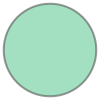

In [83]:
gdf1 = sub_line_with_buffers['Metro 50: Gein => Isolatorweg']
gdf1.iloc[0]['geometry']

In [83]:
def find_transfer_stations_multi_net():
    .intersects()
transfer_sub_tram = {}
for route_name, station_buffer_df in sub_line_with_buffers.items():
    inside_tram_stations = []
    
    for index, row in station_buffer_df.iterrows():
        polygon = row['geometry']
        
    
    buffered_geo_df = gpd.GeoDataFrame(geometry=node_buffers, crs='EPSG:4326')
    transfer_sub_tram[route_name] = buffered_geo_df

IndentationError: expected an indented block after function definition on line 1 (3266522514.py, line 3)

### Get transfer stations randomly 

In [74]:
buffer_radius1 = 100
buffer_radius2 = 200
buffer_radius3 = 300

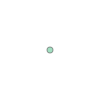

In [75]:
three_networks_nodes.iloc[0][0]

In [76]:
circle = three_networks_nodes.iloc[0][0].buffer(buffer_radius1)

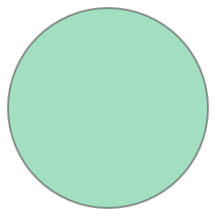

In [77]:
circle

In [78]:
three_networks_nodes['t_circle1'] = three_networks_nodes['geometry'].apply(lambda x: x.buffer(buffer_radius1))
three_networks_nodes['t_circle2'] = three_networks_nodes['geometry'].apply(lambda x: x.buffer(buffer_radius2))
three_networks_nodes['t_circle3'] = three_networks_nodes['geometry'].apply(lambda x: x.buffer(buffer_radius3))

In [79]:
three_networks_nodes

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer,t_circle1,t_circle2,t_circle3
0,POINT (4.98916 52.29641),2,328,Gein,4.989161,52.296407,"(4.9891612, 52.2964067)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54","POLYGON ((104.989 52.296, 104.508 42.495, 103....","POLYGON ((204.989 52.296, 204.026 32.693, 201....","POLYGON ((304.989 52.296, 303.545 22.891, 299...."
1,POINT (4.97400 52.29564),2,855,Reigersbos,4.974000,52.295637,"(4.9740002, 52.2956365)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54","POLYGON ((104.974 52.296, 104.492 42.494, 103....","POLYGON ((204.974 52.296, 204.011 32.692, 201....","POLYGON ((304.974 52.296, 303.529 22.890, 299...."
2,POINT (4.96013 52.29813),2,854,Holendrecht,4.960126,52.298132,"(4.9601264, 52.2981319)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54","POLYGON ((104.960 52.298, 104.479 42.496, 103....","POLYGON ((204.960 52.298, 203.997 32.695, 201....","POLYGON ((304.960 52.298, 303.516 22.893, 299...."
3,POINT (4.95213 52.30687),2,810,Bullewijk,4.952129,52.306869,"(4.9521292, 52.306869)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54","POLYGON ((104.952 52.307, 104.471 42.505, 103....","POLYGON ((204.952 52.307, 203.989 32.703, 201....","POLYGON ((304.952 52.307, 303.508 22.902, 299...."
4,POINT (4.94762 52.31181),2,809,Bijlmer ArenA,4.947618,52.311806,"(4.9476178, 52.311806)",Metro 50: Gein => Isolatorweg,subway,"50, 54","50, 54","POLYGON ((104.948 52.312, 104.466 42.510, 103....","POLYGON ((204.948 52.312, 203.985 32.708, 201....","POLYGON ((304.948 52.312, 303.503 22.907, 299...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,POINT (4.99474 52.35561),2,67471,Diemerparklaan,4.994741,52.355608,"(4.9947414, 52.355608)",Bus 66: Amsterdam Bijlmer ArenA => Amsterdam I...,bus,66,None,"POLYGON ((104.995 52.356, 104.513 42.554, 103....","POLYGON ((204.995 52.356, 204.032 32.752, 201....","POLYGON ((304.995 52.356, 303.550 22.950, 299...."
753,POINT (4.82444 52.34041),3,15699,John M. Keynesplein,4.824444,52.340413,"(4.824444, 52.340413)",Bus 68: Amsterdam Riekerpolder => Amsterdam He...,bus,"267, 68","267, 68","POLYGON ((104.824 52.340, 104.343 42.539, 102....","POLYGON ((204.824 52.340, 203.861 32.737, 200....","POLYGON ((304.824 52.340, 303.380 22.935, 299...."
754,POINT (4.82789 52.34108),2,11244,IBM,4.827888,52.341080,"(4.827888, 52.3410803)",Bus 68: Amsterdam Riekerpolder => Amsterdam He...,bus,"267, 68","267, 68","POLYGON ((104.828 52.341, 104.346 42.539, 102....","POLYGON ((204.828 52.341, 203.865 32.738, 200....","POLYGON ((304.828 52.341, 303.383 22.936, 299...."
755,POINT (4.82867 52.34260),3,26843,Parkeerdek,4.828668,52.342595,"(4.8286682, 52.3425954)",Bus 68: Amsterdam Riekerpolder => Amsterdam He...,bus,68,None,"POLYGON ((104.829 52.343, 104.347 42.541, 102....","POLYGON ((204.829 52.343, 203.866 32.739, 200....","POLYGON ((304.829 52.343, 303.384 22.937, 299...."
